# File Information

__Author__: "Tan Hua Beng, G2203829L"

__Email__: "w220032@e.ntu.edus.g"

__Project__ = "IN6277 Assignment 1.1"

__Description__ = "Jupyter notebook containing the workings, notes, and code for IN6277 assignment 1.1. This assignment uses a dataset provided and develops a classification model based on a selected algorithm. Apply implemented algorithm to the training dataset, and estimate the performance of the model on the testing dataset."

__License__ = "See README.md"

__Version__ = "1.0.0"


> **Note: Check the next cell before executing**

In [1]:
# Set to skip visualization cell execution
G_SKIP_VISUALIZATION = True

# Set to remove instances with missing values
# Can be set to "Yes" - Remove instances with missing values, "No" - Do not remove instances with missing values, or a string "Both" to run both
G_REMOVE_MISSING_VALUES = "Both"

# Initial Study

1. Understanding assignment requirements 1.1
    - Implement classification algorithm of choice for prediction
    - Prediction task is to determine whether a person makes over 50K a year.

2. Initial understanding dataset files, features/ variables, sample space, dimensions, size
    ><b>See adult.names file for original description of the dataset.</b>
    
    - Data source: https://archive.ics.uci.edu/dataset/20/census+income
    - Files: adult.data – training data, adult.names - description, adult.text – test data
    - 14 features/ attributes/ IVs of categorical/ integer type
    - Unknown values represented by "?"
    - 1 target/ DV Income
    - 48842 Instances/ records
    - Has missing values
    - Extraction conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
    - Variable table as follows:

<table><thead><tr><th>Variable Name</th><th>Role</th><th>Type</th><th>Demographic</th><th>Description</th><th>Units</th><th>Missing Values</th></tr></thead> <tbody><tr><td>age</td><td>Feature</td><td>Integer</td><td>Age</td><td>N/A</td><td></td><td>no</td> </tr><tr><td>workclass</td><td>Feature</td><td>Categorical</td><td>Income</td><td>Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</td><td></td><td>yes</td> </tr><tr><td>fnlwgt</td><td>Feature</td><td>Integer</td><td></td><td></td><td></td><td>no</td> </tr><tr><td>education</td><td>Feature</td><td>Categorical</td><td>Education Level</td><td> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</td><td></td><td>no</td> </tr><tr><td>education-num</td><td>Feature</td><td>Integer</td><td>Education Level</td><td></td><td></td><td>no</td> </tr><tr><td>marital-status</td><td>Feature</td><td>Categorical</td><td>Other</td><td>Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</td><td></td><td>no</td> </tr><tr><td>occupation</td><td>Feature</td><td>Categorical</td><td>Other</td><td>Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</td><td></td><td>yes</td> </tr><tr><td>relationship</td><td>Feature</td><td>Categorical</td><td>Other</td><td>Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</td><td></td><td>no</td> </tr><tr><td>race</td><td>Feature</td><td>Categorical</td><td>Race</td><td>White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</td><td></td><td>no</td> </tr><tr><td>sex</td><td>Feature</td><td>Binary</td><td>Sex</td><td>Female, Male.</td><td></td><td>no</td> </tr><tr><td>capital-gain</td><td>Feature</td><td>Integer</td><td></td><td></td><td></td><td>no</td> </tr><tr><td>capital-loss</td><td>Feature</td><td>Integer</td><td></td><td></td><td></td><td>no</td> </tr><tr><td>hours-per-week</td><td>Feature</td><td>Integer</td><td></td><td></td><td></td><td>no</td> </tr><tr><td>native-country</td><td>Feature</td><td>Categorical</td><td>Other</td><td>United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&amp;Tobago, Peru, Hong, Holand-Netherlands.</td><td></td><td>yes</td> </tr><tr><td>income</td><td>Target</td><td>Binary</td><td>Income</td><td>&gt;50K, &lt;=50K.</td><td></td><td>no</td> </tr></tbody></table>

# Create development environment in anaconda

A virual environment is created with running python version 3.9.18. Following is the requirements.txt.

In [2]:
!pip list --format=freeze > requirements.txt
!conda list -e > conda_requirements.txt

appnope==0.1.3
asttokens==2.4.0
backcall==0.2.0
backports.functools-lru-cache==1.6.5
Bottleneck==1.3.5
comm==0.1.4
contourpy==1.0.5
cycler==0.11.0
debugpy==1.6.7
decorator==5.1.1
exceptiongroup==1.1.3
executing==1.2.0
fonttools==4.25.0
importlib-metadata==6.8.0
importlib-resources==5.2.0
ipykernel==6.25.2
ipython==8.15.0
jedi==0.19.0
Jinja2==3.1.2
joblib==1.2.0
jupyter_client==8.3.1
jupyter_core==5.3.1
kiwisolver==1.4.4
MarkupSafe==2.1.1
matplotlib==3.7.2
matplotlib-inline==0.1.6
missingno==0.4.2
mkl-fft==1.3.6
mkl-random==1.2.2
mkl-service==2.4.0
munkres==1.1.4
nest-asyncio==1.5.6
numexpr==2.8.4
numpy==1.25.2
packaging==23.1
pandas==2.0.3
parso==0.8.3
pexpect==4.8.0
pickleshare==0.7.5
Pillow==9.4.0
pip==23.2.1
platformdirs==3.10.0
prompt-toolkit==3.0.39
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
Pygments==2.16.1
pyparsing==3.0.9
python-dateutil==2.8.2
pytz==2022.7
pyzmq==24.0.1
scikit-learn==1.2.2
scipy==1.11.1
seaborn==0.12.2
setuptools==68.0.0
six==1.16.0
stack-data==0.6.2
thr

# Import libraries and set global variables

In [3]:
import os
import jinja2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import missingno as msno

In [4]:
G_DATASET_DIR="Census_Income_Data_Set"
G_DATASET_FILE_TRAIN=os.path.join(G_DATASET_DIR, "adult.data")
G_DATASET_FILE_TEST=os.path.join(G_DATASET_DIR, "adult.test")

# Exporatory and Pre-processing of data

Load the provided dataset for exploratory, dropping redundant features (if required), and handling missing values (if any).

## Load data from CSV into pandas dataframe

In [5]:
ds_header_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 
                   'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

ds_header_names_encoded = ['age-binned', 'workclass-num', 'fnlwgt', 'education-num', 'marital-status-num', 'occupation-num', 'relationship-num', 'race-num', 
                   'sex-num', 'capital-gain-binned', 'capital-loss-binned', 'hours-per-week-binned', 'native-country-num', 'income-num']

encoded_columns_list = ['occupation', 'education', 'marital-status', 'workclass', 'native-country', 'sex', 'race', 'relationship']

encoded_columns_binned_list = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

ds_encoded_dict = {
    'age-binned': {0: '0-9', 1: '10-19', 2: '20-29', 3: '30-39', 4: '40-49', 5: '50-59', 6: '60-69', 7: '70-79', 8: '80-89', 9: '90-99'},
    'age-binned-cut': {0: 10, 1: 20, 2: 30, 3: 40, 4: 50, 5: 60, 6: 70, 7: 80, 8: 90, 9: 100},
    'workclass-num': {0: '?', 1: 'Private', 2: 'Self-emp-not-inc', 3: 'Local-gov', 4: 'State-gov', 5: 'Self-emp-inc', 6: 'Federal-gov', 7: 'Without-pay', 
                      8: 'Never-worked'},
    'education-num': {1: 'Preschool', 2: '1st-4th', 3: '5th-6th', 4: '7th-8th', 5: '9th', 6: '10th', 7: '11th', 8: '12th', 9: 'HS-grad', 10: 'Some-college', 
                      11: 'Assoc-voc', 12: 'Assoc-acdm', 13: 'Bachelors', 14: 'Masters', 15: 'Prof-school', 16: 'Doctorate'},
    'marital-status-num': {1: 'Never-married', 2: 'Married-civ-spouse', 3: 'Divorced', 4: 'Married-spouse-absent', 5: 'Separated', 6: 'Married-AF-spouse', 7: 'Widowed'},
    'occupation-num': {0: '?', 1: 'Adm-clerical', 2: 'Armed-Forces', 3: 'Craft-repair', 4: 'Exec-managerial', 5: 'Farming-fishing', 6: 'Handlers-cleaners', 
                       7: 'Machine-op-inspct', 8: 'Other-service', 9: 'Priv-house-serv', 10: 'Prof-specialty', 11: 'Protective-serv', 12: 'Sales', 13: 'Tech-support', 
                       14: 'Transport-moving'},
    'relationship-num': {1: 'Not-in-family', 2: 'Husband', 3: 'Own-child', 4: 'Unmarried', 5: 'Wife', 6: 'Other-relative'},
    'race-num': {1: 'Black', 2: 'White', 3: 'Asian-Pac-Islander', 4: 'Amer-Indian-Eskimo', 5: 'Other'},
    'sex-num': {1: 'Male', 2: 'Female'},
    'capital-gain-binned': {0: '1-9999', 1: '10000-19999', 2: '20000-29999', 3: '30000-39999', 4: '40000-49999', 5: '50000-59999', 6: '60000-69999',
                              7: '70000-79999', 8: '80000-89999', 9: '90000-99999'},
    'capital-gain-binned-cut': {0: 10000, 1: 20000, 2: 30000, 3: 40000, 4: 50000, 5: 60000, 6: 70000, 7: 80000, 8: 90000, 9: 100000},
    'capital-loss-binned': {0: '1-999', 1: '1000-1999', 2: '2000-2999', 3: '3000-3999', 4: '4000-4999', 5: '5000-5999', 6: '6000-6999', 7: '7000-7999',
                            8: '8000-8999', 9: '9000-9999'},
    'capital-loss-binned-cut': {0: 1000, 1: 2000, 2: 3000, 3: 4000, 4: 5000, 5: 6000, 6: 7000, 7: 8000, 8: 9000, 9: 10000},
    'hours-per-week-binned': {0: '1-9', 1: '10-19', 2: '20-29', 3: '30-39', 4: '40-49', 5: '50-59', 6: '60-69', 7: '70-79', 8: '80-89', 9: '90-99'},
    'hours-per-week-binned-cut': {0: 10, 1: 20, 2: 30, 3: 40, 4: 50, 5: 60, 6: 70, 7: 80, 8: 90, 9: 100},
    'native-country-num': {0: '?', 1: 'United-States', 2: 'Mexico', 3: 'Philippines', 4: 'Germany', 5: 'Canada', 6: 'Puerto-Rico', 7: 'El-Salvador', 8: 'India',
                            9: 'Cuba', 10: 'England', 11: 'Jamaica', 12: 'South', 13: 'China', 14: 'Italy', 15: 'Dominican-Republic', 16: 'Vietnam', 17: 'Guatemala',
                            18: 'Japan', 19: 'Poland', 20: 'Columbia', 21: 'Taiwan', 22: 'Haiti', 23: 'Iran', 24: 'Portugal', 25: 'Nicaragua', 26: 'Peru',
                            27: 'Greece', 28: 'France', 29: 'Ecuador', 30: 'Ireland', 31: 'Hong', 32: 'Cambodia', 33: 'Trinadad&Tobago', 34: 'Thailand', 35: 'Laos',
                            36: 'Yugoslavia', 37: 'Outlying-US(Guam-USVI-etc)', 38: 'Hungary', 39: 'Honduras', 40: 'Scotland', 41: 'Holand-Netherlands'},
    'income-num': {0: '<=50K', 1: '>50K'}
}


In [6]:
# Load data into pandas dataframe; dataset has not header; test dataset as a metadata on the first row; unknown values are marked as '?'
ds_train = pd.read_csv(G_DATASET_FILE_TRAIN, sep=',', header=None, names=ds_header_names)
ds_test = pd.read_csv(G_DATASET_FILE_TEST, sep=',', header=None, names=ds_header_names, skiprows=1)

## Sanity checks on loaded data in pandas dataframe

In [7]:
# sanity checks on train data
print("Shape of the training dataset: ", str(ds_train.shape), "\n")
print(ds_train.head())
print("\n")
print(ds_train.describe().round(1))

Shape of the training dataset:  (32561, 15) 

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174       

In [8]:
# sanity checks on test data
print("Shape of the testing dataset: ", str(ds_test.shape), "\n")
print(ds_test.head())
print("\n")
print(ds_test.describe().round(1))


Shape of the testing dataset:  (16281, 15) 

   age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   inc

## Print unique values to explore data values or null in columns

In [9]:
# Function to print unique values of each column in loaded dataset
def print_unique_values(dataset, dataset_name = "dataset"):
    print(f"Unique values in {dataset_name}: \n")
    for col in dataset.columns:
        print(col, ": ", dataset[col].nunique(), " ", dataset[col].unique(), "\n")

# Check and print unique values of each column
print_unique_values(ds_train, "training dataset")
print_unique_values(ds_test, "testing dataset")

ds_train.isnull().sum()
ds_test.isnull().sum()


Unique values in training dataset: 

age :  73   [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass :  9   [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt :  21648   [ 77516  83311 215646 ...  34066  84661 257302] 

education :  16   [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education-num :  16   [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status :  7   [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation :  15   [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Trim whitespaces in data values noticed from exploring unique values

In [10]:
# Trim whitespace from each value in each column
ds_train = ds_train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
ds_test = ds_test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Check and print unique values of each column after trimming
print_unique_values(ds_train, "training dataset")
print_unique_values(ds_test, "testing dataset")

Unique values in training dataset: 

age :  73   [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass :  9   ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt :  21648   [ 77516  83311 215646 ...  34066  84661 257302] 

education :  16   ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education-num :  16   [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status :  7   ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation :  15   ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales'

## Remove weird period in test dataset income colume - '<=50K.' '>50K.'

In [11]:
# Remove trailing periods in the income column
ds_train['income'] = ds_train['income'].str.replace('.', '')
ds_test['income'] = ds_test['income'].str.replace('.', '')

# Check and print unique values of each column after removing trailing periods
print("Training dataset income column unique values: ", ds_train['income'].nunique(), ds_train['income'].unique())
print("Testing dataset income column unique values: ", ds_test['income'].nunique(), ds_test['income'].unique())

Training dataset income column unique values:  2 ['<=50K' '>50K']
Testing dataset income column unique values:  2 ['<=50K' '>50K']


## Combine dataset

In [12]:
# Function to receive training and testing datasets and return a single dataset
def get_dataset(ds_train, ds_test):
    ds_train_copy = ds_train.copy()
    ds_test_copy = ds_test.copy()
    ds_train_copy['dataset'] = 'train'
    ds_test_copy['dataset'] = 'test'
    ds = pd.concat([ds_train_copy, ds_test_copy], ignore_index=True)
    return ds

In [13]:
# Plot combined train and test data for visualization
# Concat ds_train and ds_test
ds_combined = get_dataset(ds_train, ds_test)

# Print shape and data of ds_combined
print("Shape of the combined dataset: ", str(ds_combined.shape), "\n")
print(ds_combined.head())


Shape of the combined dataset:  (48842, 16) 

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income dataset  
0          2174             0              40  United-Stat

## Plot data visually to check distribution and split
A quick comparison of the data distribution similarity, split, and correlation between variables of the train and test datasets.

In [14]:
if not G_SKIP_VISUALIZATION:
    # Plat combined data for visualization with alpha=0.1 with tight_layout=True, to observe if test and train data are similar in distribution/ representation
    sns.pairplot(ds_combined, hue='dataset', plot_kws={'alpha': 0.1}, palette='husl', markers=['x', '+'])


## Label encode non-numerical categorical values

In [15]:
# Substitute ds_combined occupation column with numerical encoding with ds_encoded_dict
ds_combined['occupation-num'] = ds_combined['occupation'].replace({v: k for k, v in ds_encoded_dict['occupation-num'].items()})

# Check if ds_combined has non-numeric values in occupation column, print unique values of occupation-num column
temp_list = ds_combined['occupation-num'].unique().tolist()

# Order values and print unique values of occupation-num column
temp_list.sort()
print("Unique values in occupation-num column: ", temp_list, "\n")


Unique values in occupation-num column:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 



In [16]:
# Convert income column to 0 and 1 using ds_encoded_dict
ds_combined['income-num'] = ds_combined['income'].replace({v: k for k, v in ds_encoded_dict['income-num'].items()})

# Convert sex column to 0 and 1
ds_combined['sex-num'] = ds_combined['sex'].replace({v: k for k, v in ds_encoded_dict['sex-num'].items()})

# Convert race column to numerical values
ds_combined['race-num'] = ds_combined['race'].replace({v: k for k, v in ds_encoded_dict['race-num'].items()})

# Convert marital-status column to 0 and 1
ds_combined['marital-status-num'] = ds_combined['marital-status'].replace({v: k for k, v in ds_encoded_dict['marital-status-num'].items()})

# Convert workclass column to numerical values
ds_combined['workclass-num'] = ds_combined['workclass'].replace({v: k for k, v in ds_encoded_dict['workclass-num'].items()})

In [17]:
# Convert native-country column to numerical values
ds_combined['native-country-num'] = ds_combined['native-country'].replace({v: k for k, v in ds_encoded_dict['native-country-num'].items()})

# Convert relationship column to numerical values
ds_combined['relationship-num'] = ds_combined['relationship'].replace({v: k for k, v in ds_encoded_dict['relationship-num'].items()})

# Convert age column into bins
ds_combined['age-binned'] = pd.cut(ds_combined['age'], bins=[0]+list(ds_encoded_dict['age-binned-cut'].values()), labels=ds_encoded_dict['age-binned-cut'].keys())

# Convert working hours per week into bins
ds_combined['hours-per-week-binned'] = pd.cut(ds_combined['hours-per-week'], bins=[0]+list(ds_encoded_dict['hours-per-week-binned-cut'].values()), labels=ds_encoded_dict['hours-per-week-binned-cut'].keys())

# Convert capital-gain column into bins, starting with -1 to include 0 values
ds_combined['capital-gain-binned'] = pd.cut(ds_combined['capital-gain'], bins=[-1]+list(ds_encoded_dict['capital-gain-binned-cut'].values()), labels=ds_encoded_dict['capital-gain-binned-cut'].keys())

# Convert capital-loss column into bins, starting with -1 to include 0 values
ds_combined['capital-loss-binned'] = pd.cut(ds_combined['capital-loss'], bins=[-1]+list(ds_encoded_dict['capital-loss-binned-cut'].values()), labels=ds_encoded_dict['capital-loss-binned-cut'].keys())



In [18]:
# Check if ds_combined has unexpected values in occupation-num, income-num, sex-num, race-num, marital-status-num, workclass-num, native-country-num, relationship-num, hours-per-week-binned columns
print_unique_values(ds_combined, "combined dataset")

# Check if any columns have null values
ds_combined.isnull().sum()


Unique values in combined dataset: 

age :  74   [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 

workclass :  9   ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt :  28523   [ 77516  83311 215646 ... 173449  89686 350977] 

education :  16   ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education-num :  16   [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status :  7   ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation :  15   ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sal

age                      0
workclass                0
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
native-country           0
income                   0
dataset                  0
occupation-num           0
income-num               0
sex-num                  0
race-num                 0
marital-status-num       0
workclass-num            0
native-country-num       0
relationship-num         0
age-binned               0
hours-per-week-binned    0
capital-gain-binned      0
capital-loss-binned      0
dtype: int64

## Plot Histograms for visualization (Unstacked)

In [19]:
if not G_SKIP_VISUALIZATION:
    # Plot ds_combined_high_income and ds_combined_low_income data for all columns stacked vertically
    columns_to_plot = ds_header_names_encoded

    # Set the style for the plots (optional)
    sns.set(style="whitegrid")

    # Create subplots for each column
    for column in columns_to_plot:
        plt.figure(figsize=(8, 6))
        
        # Create the histograms using Seaborn's histplot
        sns.histplot(ds_combined[ds_combined['income'] == '>50K'][column], kde=True, color='blue', label='>50K')
        sns.histplot(ds_combined[ds_combined['income'] == '<=50K'][column], kde=True, color='red', label='<=50K')
        
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.title(f'Histogram of {column} by Income Group')
        
        plt.show()


## Plot graph to visualize data using occupation-num and education-num

In [20]:
if not G_SKIP_VISUALIZATION:
    # Plot graph with occupation-num column and education-num column
    sns.violinplot(x='occupation-num', y='education-num', data=ds_combined, palette='husl')


## Plot stacked crosstab by income

In [21]:
# Iterate through encoded columns and print mapping and count of each column
for i in encoded_columns_list:
    print("Encoding of", i, "column mapping: \n")
    print(ds_combined.groupby([i, i + '-num']).size().reset_index(name='counts'))
    print("\n")

# Iterate through encoded binned columns and print mapping and count of each column
for i in encoded_columns_binned_list:
    print("Encoding of", i, "column mapping: \n")
    print(ds_combined.groupby([i + '-binned', i]).size().reset_index(name='counts'))
    print("\n")

Encoding of occupation column mapping: 

           occupation  occupation-num  counts
0                   ?               0    2809
1        Adm-clerical               1    5611
2        Armed-Forces               2      15
3        Craft-repair               3    6112
4     Exec-managerial               4    6086
5     Farming-fishing               5    1490
6   Handlers-cleaners               6    2072
7   Machine-op-inspct               7    3022
8       Other-service               8    4923
9     Priv-house-serv               9     242
10     Prof-specialty              10    6172
11    Protective-serv              11     983
12              Sales              12    5504
13       Tech-support              13    1446
14   Transport-moving              14    2355


Encoding of education column mapping: 

       education  education-num  counts
0           10th              6    1389
1           11th              7    1812
2           12th              8     657
3        1st-4th     

In [22]:
# Function to plot two bar charts side by side stacked crosstab
def plot_crosstab(ds_col1, ds_col2, title, xlabel, ylabel, xticks_rotation=0, colors=['red', 'blue'], figsize=(10, 5)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # First subplot
    plt.subplot(1, 2, 1)
    plotgraph1 = pd.crosstab(index=ds_col1, columns=ds_col2)
    plotgraph1.plot(ax=ax1, kind='bar', stacked=True, color=colors, grid=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xticks_rotation)

    # Second subplot
    plt.subplot(1, 2, 2)
    plotgraph2= pd.crosstab(index=ds_col1, columns=ds_col2, normalize='index')
    plotgraph2.plot(ax=ax2, kind='bar', stacked=True, color=colors, grid=False)
    plt.title(title + ' (normalized)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xticks_rotation)

    plt.show()

In [23]:
if not G_SKIP_VISUALIZATION:
    # Plot pie chart with income-num column with palette='husl'
    ds_combined['income-num'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue'], figsize=(5, 5), title='Income Distribution')

    # Plot graph with occupation-num and income-num columns crosstab stacked
    plot_crosstab(ds_combined['occupation-num'], ds_combined['income-num'], 'Income based on Occupation', 'Occupation', 'Count', 90)

    # Plot graph with education-num and income-num columns crosstab stacked
    plot_crosstab(ds_combined['education-num'], ds_combined['income-num'], 'Income based on Education', 'Education', 'Count', 90)

    # Plot graph with workclass-num and income-num columns crosstab stacked
    plot_crosstab(ds_combined['workclass-num'], ds_combined['income-num'], 'Income based on Workclass', 'Workclass', 'Count', 90)

    # Plot graph with marital-status-num and income-num columns crosstab stacked
    plot_crosstab(ds_combined['marital-status-num'], ds_combined['income-num'], 'Income based on Marital Status', 'Marital Status', 'Count', 90)

    # Plot graph with native-country-num and income-num columns crosstab stacked
    plot_crosstab(ds_combined['native-country-num'], ds_combined['income-num'], 'Income based on Native Country', 'Native Country', 'Count', 90)

    # Plot graph with race-num and income-num columns crosstab stacked
    plot_crosstab(ds_combined['race-num'],ds_combined['income-num'], 'Income based on Race', 'Race', 'Count', 90)

    # Plot graph with sex-num and income-num columns crosstab stacked
    plot_crosstab(ds_combined['sex-num'], ds_combined['income-num'], 'Income based on Gender', 'Gender', 'Count', 90)

    # Plot graph with age-binned and income-num columns crosstab stacked
    plot_crosstab(ds_combined['age-binned'], ds_combined['income-num'], 'Income based on Age', 'Age', 'Count', 90)

    # Plot graph with hours-per-week-binned and income-num columns crosstab stacked
    plot_crosstab(ds_combined['hours-per-week-binned'], ds_combined['income-num'], 'Income based on Working Hours per Week', 'Working Hours per Week', 'Count', 90)

    # Plot graph with capital-gain-binned and income-num columns crosstab stacked
    plot_crosstab(ds_combined['capital-gain-binned'], ds_combined['income-num'], 'Income based on Capital Gain', 'Capital Gain', 'Count', 90)

    # Plot graph with capital-loss-binned and income-num columns crosstab stacked
    plot_crosstab(ds_combined['capital-loss-binned'], ds_combined['income-num'], 'Income based on Capital Loss', 'Capital Loss', 'Count', 90)


## Imbalanced Data
From the histogram and statistical summary above, there are notable data imbalance. The imbalance in representation for features such as education, gender, occupation, marital status, working hours, work class, and age may be a result of natural phenomena or demographics representation. However, the feature imbalance for **_income, native country, race_** are likely due to constraints from collection of data and can be of significance creating biased on the resulting model due to under representation. Deeper understanding of this implication should be further investigated in the future. Only a quick evaluation is conducted to look at the correlation of these variables with the primariy focus on the classifier algorithm function, and is a currrent limitation yet a common issue in real world data.

In [24]:
imbalanced_columns = ['income', 'native-country', 'race']
imbalanced_columns_encoded = ['income-num', 'native-country-num', 'race-num']

## Plot scatter with encoded dataset using pairplot hue difference by income-num 

In [25]:
if not G_SKIP_VISUALIZATION:
    # Plot pairplot of ds_combined with hue=income-num
    sns.pairplot(ds_combined[ds_header_names_encoded], hue='income-num', plot_kws={'alpha': 0.1}, palette='husl', markers=['x', '+'])

    # Save pairplot of ds_combined with hue=income-num to file
    plt.savefig('ds_combined_encoded_pairplot_income-num.png')

## Plot scatter with encoded dataset using pairploat hue difference by dataset source (train/ test)

In [26]:
if not G_SKIP_VISUALIZATION:
    # Plot pairplot of ds_combined with hue=dataset
    sns.pairplot(ds_combined[ds_header_names_encoded+['dataset']], hue='dataset', plot_kws={'alpha': 0.1}, palette='husl', markers=['x', '+'])

    # Save pairplot of ds_combined with hue=dataset to file
    plt.savefig('ds_combined_encoded_pairplot_dataset.png')

## Feature selection by correlation to income

In [27]:
# Create list of feature correlation (abs) with income-num
feature_correlation = ds_combined[ds_header_names_encoded].corr()['income-num']

# Print feature_correlation sorted
print("Feature correlation sorted:")
print(feature_correlation.drop('income-num').abs().sort_values(ascending=False), "\n")

# Identify significant features with correlation by setting threshold
significant_features = feature_correlation[feature_correlation.abs() > 0.01].index.tolist()
print("Significant features:")
print(significant_features, "\n")

# Identify insignificant features with correlation by setting threshold
insignificant_features = feature_correlation[feature_correlation.abs() <= 0.01].index.tolist()
print("Insignificant features:")
print(insignificant_features, "\n")

# Print columns in ds_combined not in ds_header_names_encoded + age + hours-per-week + capital-gain + capital-loss
significant_features_original = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']
print(f"Columns in ds_combined not required (excluding {significant_features_original}):")
required_columns = set(ds_header_names_encoded + significant_features_original)
unrequired_columns = set(ds_combined.columns) - required_columns
print(unrequired_columns, "\n")

Feature correlation sorted:
education-num            0.332613
hours-per-week-binned    0.226595
age-binned               0.224554
sex-num                  0.214628
capital-gain-binned      0.177530
workclass-num            0.154423
capital-loss-binned      0.121946
occupation-num           0.076722
relationship-num         0.054008
race-num                 0.033723
native-country-num       0.016793
fnlwgt                   0.006339
marital-status-num       0.002517
Name: income-num, dtype: float64 

Significant features:
['age-binned', 'workclass-num', 'education-num', 'occupation-num', 'relationship-num', 'race-num', 'sex-num', 'capital-gain-binned', 'capital-loss-binned', 'hours-per-week-binned', 'native-country-num', 'income-num'] 

Insignificant features:
['fnlwgt', 'marital-status-num'] 

Columns in ds_combined not required (excluding ['age', 'hours-per-week', 'capital-gain', 'capital-loss']):
{'income', 'education', 'race', 'dataset', 'marital-status', 'relationship', 'occupation

In [28]:
if not G_SKIP_VISUALIZATION:
    # Plot heatmap of ds_combined encoded with correlation
    plt.figure(figsize=(12, 10))
    sns.heatmap(ds_combined[ds_header_names_encoded].corr(), annot=True, cmap='coolwarm', linewidths=0.2)


The important features will be retained while dropping features with low correlation. Columns not required can also be dropped.
>Note: From comparison, binning seems to lower the correlation value to target, i.e. capital-gain-binned has lower correlation than capital-gain.

## Handling missing values?

### Summarized count of missing values in original features

In [29]:
# Count ? values in each column
for i in ds_combined[ds_header_names]:
    print(i, ":", ds_combined[ds_combined[i] == '?'][i].count())

missing_columns = ['workclass', 'occupation', 'native-country']
missing_columns_encoded = ['workclass-num', 'occupation-num', 'native-country-num']

age : 0
workclass : 2799
fnlwgt : 0
education : 0
education-num : 0
marital-status : 0
occupation : 2809
relationship : 0
race : 0
sex : 0
capital-gain : 0
capital-loss : 0
hours-per-week : 0
native-country : 857
income : 0


### Compute the count and percentage of missing values relative to the groups for a column
Focusing on the top correlated features to income

In [30]:
# Function to count number of ? in each column, and percentage of ? in each column group
def count_missing_values(dataset, dataset_name = "dataset"):
    print(f"Missing values in {dataset_name}:")
    for col in dataset.columns:
        print(col, ": ", dataset[col].isin(['?']).sum(), " ", dataset[col].isin(['?']).sum()/dataset.shape[0])

# Function to generate table with count of missing values in workclass, occupation, native-country columns respectively. Add columns with percentage of missing values in each column, split by dataset column = train or test
def generate_table_missing_count_for_won_by_column(ds, group_by_column_name=['dataset']):
    return ds.groupby(group_by_column_name).apply(lambda x: pd.Series({
        'workclass_missing_values_count': x['workclass'].isin(['?']).sum(),
        'occupation_missing_values_count': x['occupation'].isin(['?']).sum(),
        'native-country_missing_values_count': x['native-country'].isin(['?']).sum(),
        'workclass_missing_values_percentage': x['workclass'].isin(['?']).sum()/x.shape[0],
        'occupation_missing_values_percentage': x['occupation'].isin(['?']).sum()/x.shape[0],
        'native-country_missing_values_percentage': x['native-country'].isin(['?']).sum()/x.shape[0]
    }) if x.shape[0] > 0 else pd.Series({
        'workclass_missing_values_count': 0,
        'occupation_missing_values_count': 0,
        'native-country_missing_values_count': 0,
        'workclass_missing_values_percentage': 0,
        'occupation_missing_values_percentage': 0,
        'native-country_missing_values_percentage': 0
        }))

In [31]:
if not G_SKIP_VISUALIZATION:
    # Generate a table with count of missing values in workclass, occupation, native-country columns respectively. Add columns with percentage of missing values in each column, split by dataset column = train or test
    ds_combined_missing_values = generate_table_missing_count_for_won_by_column(ds_combined)

    # Plot two bar charts of ds_combined_missing_values. One by count of missing values, one by percentage of missing values. Using subplot to plot side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # First subplot
    plt.subplot(1, 2, 1)
    ds_combined_missing_values[['workclass_missing_values_count', 'occupation_missing_values_count', 'native-country_missing_values_count']].plot(kind='bar', ax=ax1, title='Missing Values in Combined Dataset', rot=0)

    # Second subplot
    plt.subplot(1, 2, 2)
    ds_combined_missing_values[['workclass_missing_values_percentage', 'occupation_missing_values_percentage', 'native-country_missing_values_percentage']].plot(kind='bar', ax=ax2, title='Missing Values Percentage in Combined Dataset', rot=0)

    plt.tight_layout()
    plt.show()

    # Iterate through top significant features and plot two bar charts of ds_combined_missing_values.
    for i in feature_correlation.drop('income-num').abs().sort_values(ascending=False).head(5).index.tolist():
        print("Plotting missing values for", i, "column")
        # Generate table with count of missing values in workclass, occupation, native-country columns respectively. Add columns with percentage of missing values in each column, split by i column
        ds_combined_missing_values = generate_table_missing_count_for_won_by_column(ds_combined, group_by_column_name=[i])
        # Plot two bar charts of ds_combined_missing_values. One by count of missing values, one by percentage of missing values. Using subplot to plot side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

        # First subplot
        plt.subplot(1, 2, 1)
        ds_combined_missing_values[['workclass_missing_values_count', 'occupation_missing_values_count', 'native-country_missing_values_count']].plot(kind='bar', ax=ax1, title='Missing Values in Combined Dataset', rot=90)

        # Second subplot
        plt.subplot(1, 2, 2)
        ds_combined_missing_values[['workclass_missing_values_percentage', 'occupation_missing_values_percentage', 'native-country_missing_values_percentage']].plot(kind='bar', ax=ax2, title='Missing Values Percentage in Combined Dataset', rot=90)

        plt.tight_layout()
        plt.show()


### Compute the missing value count and percentage in workclass, occupation, native-country columns individually for each group of highly imbalanced variables (income, race, native-country)

In [32]:
# Function to generate count of ? in specified column group by another column
def generate_missing_values_count_by_column(dataset, column_name, group_by_column_name, missing_value_indicator = 0):
    # Generate total count of records by group
    dataset_missing_values = dataset.groupby(group_by_column_name).size().reset_index(name='total_count')
    # Generate count of missing values in column_name by group
    # Initialize missing_values_count column with 0
    dataset_missing_values['missing_values_count'] = 0
    # Initialize mssing_value_percentage column with 0
    dataset_missing_values['missing_values_percentage'] = 0
    # Iterate through each group, check if total_count is 0
    for index, row in dataset_missing_values.iterrows():
        if row['total_count'] > 0:
            dataset_missing_values.loc[index, 'missing_values_count'] = dataset[(dataset[column_name] == missing_value_indicator) & (dataset[group_by_column_name] == row[group_by_column_name])].shape[0]
            dataset_missing_values.loc[index, 'missing_values_percentage'] = dataset_missing_values.loc[index, 'missing_values_count']/dataset_missing_values.loc[index, 'total_count'] * 100
    return dataset_missing_values.round(1)

In [33]:
if not G_SKIP_VISUALIZATION:
    # Plot two graphs using subplot side by side, showing the  missing value count/ percentage on workclass/ occupation/ native-country column, group by income/ race/ native-country
    # Iterate through income, race, native-country
    for i in imbalanced_columns_encoded:
        # Iterate through workclass, occupation, native-country
        for j in missing_columns_encoded:
            if i != j:
                print("Plotting missing values for", j, "column, grouped by", i, "column")
                # Generate count of ? in j column, group by i
                ds_combined_missing_values = generate_missing_values_count_by_column(ds_combined, j, i)
                # Plot two bar charts of ds_combined_missing_values. One by count of missing values, one by percentage of missing values. Using subplot to plot side by side
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

                # First subplot
                plt.subplot(1, 2, 1)
                ds_combined_missing_values[['missing_values_count']].plot(kind='bar', ax=ax1, title=f'Missing Values in {j}\ngroup by {i}', rot=90)

                # Second subplot
                plt.subplot(1, 2, 2)
                ds_combined_missing_values[['missing_values_percentage']].plot(kind='bar', ax=ax2, title=f'Missing Values Percentage in {j}\ngroup by {i}', rot=90)

                plt.tight_layout()
                plt.show()


### Add column to label records with missing values

In [34]:
# Add column to label if row has ? in any column
ds_combined['has_missing_values'] = ds_combined.apply(lambda x: 1 if '?' in x.values else 0, axis=1)

# Print percentage of rows with ?
print("Percentage of rows with missing values: ", ds_combined['has_missing_values'].sum()/ds_combined.shape[0] * 100, "%")

# Print percentage of rows with only ? in native-country column to total rows with ?
print("Percentage of rows with missing values in native-country column to total rows with missing values: ", ds_combined[(ds_combined['has_missing_values'] == 1) & (ds_combined['native-country'] == '?') & (ds_combined['workclass'] != '?') & (ds_combined['occupation'] != '?')].shape[0]
      / ds_combined[ds_combined['has_missing_values'] == 1].shape[0] * 100, "%")

# Print percentage of rows with only ? in native-country column to total rows
print("Percentage of rows with missing values in native-country column to total rows: ", ds_combined[(ds_combined['native-country'] == '?') & (ds_combined['workclass'] != '?') & (ds_combined['occupation'] != '?')].shape[0]
        / ds_combined.shape[0] * 100, "%")

print("\n")

# Function to generate count of ? grouped by specified column
def generate_missing_values_count(dataset, group_by_column_name):
    # Generate total count of records by group
    dataset_missing_values = dataset.groupby(group_by_column_name).size().reset_index(name='total_count')
    # Initialize missing_values_count column with 0
    dataset_missing_values['missing_values_count'] = 0
    # Initialize mssing_value_percentage column with 0
    dataset_missing_values['percentage'] = 0

    # Generate count and percentage of ? in each group
    for index, row in dataset_missing_values.iterrows():
        if row['total_count'] > 0:
            dataset_missing_values.loc[index, 'missing_values_count'] = dataset[(dataset[group_by_column_name] == row[group_by_column_name]) & (dataset['has_missing_values'] == 1)].shape[0]
            dataset_missing_values.loc[index, 'percentage'] = dataset_missing_values.loc[index, 'missing_values_count']/dataset_missing_values.loc[index, 'total_count'] * 100
            
    return dataset_missing_values

# Print missing value count and percentage grouped by imbalance columns in formatted table
for i in imbalanced_columns + feature_correlation.drop('income-num').abs().sort_values(ascending=False).head(5).index.tolist():
    temp_missing_values_count = generate_missing_values_count(ds_combined, i).sort_values(by='percentage', ascending=False)
    print(f"Count and percentage of missing values grouped by {i}: ")
    temp_missing_values_count.style.set_table_styles([{'selector' : '',
        'props' : [('border', '2px solid green')]}])
    display(temp_missing_values_count.style.format({'percentage': '{:.1f}%'}))


Percentage of rows with missing values:  7.411653904426519 %
Percentage of rows with missing values in native-country column to total rows with missing values:  22.40331491712707 %
Percentage of rows with missing values in native-country column to total rows:  1.660456164776217 %


Count and percentage of missing values grouped by income: 


,income,total_count,missing_values_count,percentage
0,<=50K,37155,3141,8.5%
1,>50K,11687,479,4.1%


Count and percentage of missing values grouped by native-country: 


,native-country,total_count,missing_values_count,percentage
0,?,857,857,100.0%
36,Taiwan,65,10,15.4%
35,South,115,14,12.2%
2,Canada,182,19,10.4%
25,Laos,23,2,8.7%
14,Haiti,75,6,8.0%
32,Portugal,67,5,7.5%
3,China,122,9,7.4%
1,Cambodia,28,2,7.1%
31,Poland,87,6,6.9%


Count and percentage of missing values grouped by race: 


,race,total_count,missing_values_count,percentage
1,Asian-Pac-Islander,1519,216,14.2%
3,Other,406,53,13.1%
2,Black,4685,457,9.8%
0,Amer-Indian-Eskimo,470,35,7.4%
4,White,41762,2859,6.8%


Count and percentage of missing values grouped by education-num: 


,education-num,total_count,missing_values_count,percentage
3,4,955,132,13.8%
0,1,83,11,13.3%
7,8,657,80,12.2%
5,6,1389,166,12.0%
2,3,509,60,11.8%
6,7,1812,193,10.7%
4,5,756,80,10.6%
1,2,247,25,10.1%
9,10,10878,979,9.0%
15,16,594,50,8.4%


Count and percentage of missing values grouped by hours-per-week-binned: 


,hours-per-week-binned,total_count,missing_values_count,percentage
0,0,1125,348,30.9%
1,1,3328,503,15.1%
2,2,3398,465,13.7%
9,9,171,14,8.2%
7,7,456,37,8.1%
3,3,26639,1729,6.5%
8,8,147,8,5.4%
5,5,3759,147,3.9%
4,4,8917,341,3.8%
6,6,902,28,3.1%


Count and percentage of missing values grouped by age-binned: 


,age-binned,total_count,missing_values_count,percentage
7,7,720,198,27.5%
8,8,148,34,23.0%
6,6,2738,526,19.2%
1,1,3623,655,18.1%
2,2,12170,878,7.2%
5,5,6202,369,5.9%
3,3,12838,547,4.3%
4,4,10403,413,4.0%
0,0,0,0,0.0%
9,9,0,0,0.0%


Count and percentage of missing values grouped by sex-num: 


,sex-num,total_count,missing_values_count,percentage
1,2,16192,1497,9.2%
0,1,32650,2123,6.5%


Count and percentage of missing values grouped by capital-gain-binned: 


,capital-gain-binned,total_count,missing_values_count,percentage
3,3,6,2,33.3%
0,0,47708,3572,7.5%
2,2,128,9,7.0%
9,9,244,15,6.1%
1,1,753,22,2.9%
4,4,3,0,0.0%
5,5,0,0,0.0%
6,6,0,0,0.0%
7,7,0,0,0.0%
8,8,0,0,0.0%


### Discussion and conclusion on approach for missing values - Imputation vs Removal

From data exploration analysis, the missing values (coded with ?) are at random. It can be argued that consideration of removing all records/ observations with at least a missing value will reduce the data size by 7.411653904426519 % which is considerably a huge set. In addition, deeper analysis performed to measure the distribution of the missing value by features with imbalanced data (income, race, native-country) and significant features (education, hours-per-week, age, gendar) suggest that the missing values are not evenly distributed (such as more missing values in smaller sized categories/ groups). Thus, removing missing values can further create bias in the dataset.

However, it cannot be ascertained if the dataset imbalance is a result of the natural phenomena and demogrphic representation (e.g. education, age, gender, workclass, occupation). There are several approach to imputation of data to fix missing values but requires deeper understanding of why the data may be missing (e.g. lack of suitable choice for selection during survey) and the source/ environment to provide greater confidence in the reliability of the selected approach. A general approach to "patching" missing values may equally introduce bias and errors.

Dropping low significance features or deleting records with missing values can provide for dimensionality and numerousity reduction. For example, native-country feature has a correlation measure of 1.6793% to income and native-country only missing value contributes to 22.40331491712707 % of total missing values, which means these records can be retained by dropping this column (reducing the % of columns to be deleted by 1.660456164776217 % from 7.411653904426519 %). There are also benefits to such reductions which includes less misleading data, better accuracy, integrity, and performance.

It is also important to consider that the features with missing values are categorical (workclass, occupation, native-country). We can thus consider the alternative which (given the count to be quite significant), to replace the missing value as a new cateogiry. This is in fact one of the imputation approach which is what has already been done in this code where the ? category is encoded as 0 for the respective feature. It is then possible to also develop a model based with this approach, while preventing data loss at the penalty of the model performance (additional category).

As a conclusion, with the primary focus/ attention on the development of the classification algorithm, they simple approach could be by deleting instances with missing values in any of the columns as discussed in the earlier paragraphs. However, considering that the missing values are categorical and the algorithm to be implemented are not affected by missing values, I will retain the missing values encoded as a new category.

> Note: Decision algorithm types C5.0 and CART are able to deal missing values (Emmanuel et al., 2021; Hambali et al., 2019; ‘Decision Tree’, 2017). Support will be included to configure handling of missing values by imputation or deletion via the global variable G_REMOVE_MISSING_VALUES.

> There is an improved imputation algorithm discussed in the by Khan and Hoque (2020) which mentions of SICE and MICE reducing the error rate and improving F-measure.

### Retain/ Remove rows with missing values

In [35]:
ds_combined_clean = {}

if G_REMOVE_MISSING_VALUES == "Yes" or G_REMOVE_MISSING_VALUES == "Both":
    # Remove rows with missing values
    ds_combined_clean["remove"] = ds_combined[ds_combined['has_missing_values'] == 0]
    ds_combined_clean["remove"].drop(columns=['has_missing_values'], inplace=True)
if G_REMOVE_MISSING_VALUES == "No" or G_REMOVE_MISSING_VALUES == "Both":
    ds_combined_clean["keep"] = ds_combined
    ds_combined_clean["keep"].drop(columns=['has_missing_values'], inplace=True)

# If G_REMOVE_MISSING_VALUES is not in the expected list of values, print error message and raise exception
if G_REMOVE_MISSING_VALUES not in ["Yes", "No", "Both"]:
    print("G_REMOVE_MISSING_VALUES is not in the expected list of values: Yes, No, Both")
    print("Please update G_REMOVE_MISSING_VALUES and re-run the notebook")
    raise Exception("G_REMOVE_MISSING_VALUES is not in the expected list of values: Yes, No, Both")


/var/folders/d8/3t9hsthx62q3f_xw0yrv_qvw0000gn/T/ipykernel_67141/71352054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_combined_clean["remove"].drop(columns=['has_missing_values'], inplace=True)


## Feature Scaling/ Normalization/ Standardization and Dimensionality Reduction

In [36]:
# Function to perform feature engineering on dataset
def perform_predefined_feature_engineering(dataset):
    # Drop columns not in required_columns and keeping dataset column for splitting train/ test later
    columns_to_drop = set(dataset.columns) - required_columns - set(['dataset'])

    # Drop insignificant features
    columns_to_drop = columns_to_drop.union(set(insignificant_features))

    # Drop columns
    dataset.drop(columns=columns_to_drop, inplace=True)

    # Print shape and data of ds_combined_no_missing_values
    print("Shape of the combined dataset with no missing values: ", str(dataset.shape), "\n")

    # List columns in ds_combined_no_missing_values
    print("Columns in ds_combined_no_missing_values: ", dataset.columns.tolist(), "\n")

    # Print data of ds_combined_no_missing_values
    print(dataset.head())

    return dataset

# Perform feature engineering on dataset
for i in ds_combined_clean:
    print("Performing feature engineering on", i, "dataset")
    ds_combined_clean[i] = perform_predefined_feature_engineering(ds_combined_clean[i])


Performing feature engineering on remove dataset
Shape of the combined dataset with no missing values:  (45222, 17) 

Columns in ds_combined_no_missing_values:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'dataset', 'occupation-num', 'income-num', 'sex-num', 'race-num', 'workclass-num', 'native-country-num', 'relationship-num', 'age-binned', 'hours-per-week-binned', 'capital-gain-binned', 'capital-loss-binned'] 

   age  education-num  capital-gain  capital-loss  hours-per-week dataset  \
0   39             13          2174             0              40   train   
1   50             13             0             0              13   train   
2   38              9             0             0              40   train   
3   53              7             0             0              40   train   
4   28             13             0             0              40   train   

   occupation-num  income-num  sex-num  race-num  workclass-num  \
0               1     

/var/folders/d8/3t9hsthx62q3f_xw0yrv_qvw0000gn/T/ipykernel_67141/2916326827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=columns_to_drop, inplace=True)


Scaling/ Normalization/ Standardization will not be applied as it is not required for the algorithm to be developed. In addtion, we may not have sufficient infomraiton about the distrubtion and variety/ veracity of the data.

# Develop algorithm

## Possible classification algorithms

The other possible classifcation algorithm includes Logistic Regression, Decision Trees, Random Forests, Gradient Boosting, Support Vector Machines, K-Nearest Neighbors, Naive Bayes, Neural Networks. However, with a dataset with relatively small number of features, it is ideal to start with simpler models such as Logistic Regression or Decision Trees.

## Decision tree algorithm

Decision tree has attributes and strengths that makes it suitable for our use case. It is easy to interpret and understand, which also comes with tools that allows us to plot/ visualize the structure/ flow especially when the dimension of features is small. In addtiion, it has implicit ability to perform feature selection by prioritizing the important features at the top of the tree. It is also able to capture non-linear relationships between features of variable data types (categorical and numerical) and the target without requiring extensive data preprocessing which makes it applicable for our census income dataset.

However, there are weaknesses that needs to be taken note of. Firstly, deicision trees are commonly prone to over-fitting especially when the tree becomes too deep (although there are techniques to address this). Second, it is sensitive to variations in data which makes it highly unstable with data udpates. Lastly, it is biased towards majority class and thus can perform poorly with classes that are under-represented - which is a case with our dataset for income groups, race, native-country, education, workclass, age, hours-per-week, and gender which are likely a natural representation and is common in real world dataset. This can be addressed with certain strategies such as sampling, class weights, or k-fold cross validation for the case of this task.

From the correlation matrix, race and native-country have lower significance (<5%) compared to other features.
- education-num            0.332613
- hours-per-week-binned    0.226595
- age-binned               0.224554
- sex-num                  0.214628
- capital-gain-binned      0.177530
- workclass-num            0.154423
- capital-loss-binned      0.121946
- occupation-num           0.076722
- relationship-num         0.054008
- race-num                 0.033723
- native-country-num       0.016793
- fnlwgt                   0.006339
- marital-status-num       0.002517

The different types of decision tree algorithm includes ID3, C4.5, C5.0, and CART.
> Information about CART. CART can process both categorical and continuous attributes, and can handle missing values. It uses the Gini Index as attribute selection measure.

## Build decision tree algorithem code/ class

In [48]:
# Python code for CART (Classification and Regression Trees) decision tree algorithm
import numpy as np
import time
from tabulate import tabulate

# Decision trees are constructed recursively and linked by nodes - Root node, Internal node, Leaf node, and branches.
# Left and right branches are used to represent the decision tree

# Create class Node to represent each node in the decision tree
class Node:
    # Initialize Node class with data/ target, left/ right attributes, feature, threshold, value attributes
    def __init__(self, data, target, feature=None, threshold=None, value=None, gini=None):
        self.data = data
        self.target = target
        self.left = None
        self.right = None
        self.feature = feature
        self.threshold = threshold
        self.value = value
        self.gini = gini

# Create the CART decision tree class
class CARTDecisionTree:
    
    # Initialize CARTDecisionTree class with max_depth, min_size, and root attributes
    def __init__(self, max_depth=None, min_size=None):
        self.max_depth = max_depth
        self.min_size = min_size
        self.root = None

    # Function for calculating the Gini index
    def gini(self, target):
        # Size of the target column
        m = target.shape[0]

        # Get the unique values in the target column
        unique_labels = np.unique(target)

        # Iterate through each unique value in the target column, calculate the probability of each unique value
        gini = 1 - sum([(np.sum(target == label)/m)**2 for label in unique_labels])

        return gini
    
    # Function for splitting the data into two groups
    def split_data(self, data, target, feature_idx, threshold):
        # Get the feature column
        feature = data[:, feature_idx]

        # Split the data into two groups
        left_data = data[feature < threshold]
        right_data = data[feature >= threshold]

        # Split the target into two groups
        left_target = target[feature < threshold]
        right_target = target[feature >= threshold]

        return left_data, right_data, left_target, right_target

    # Function for finding the best split
    def best_split(self, data, target):
        # Get the shape of the data
        sample_count, feature_count = data.shape

        best_split = {'feature_idx': None, 'threshold': None, 'gini': 1}

        # If there is only one row, return None
        if sample_count <= 1:
            return best_split
        
        # Calculate the Gini index for the parent node
        parent_gini = self.gini(target)
        best_gini = 1

        # Iterate through each feature
        for feature_idx in range(feature_count):
            # Get the unique values in the feature column
            unique_values = np.unique(data[:, feature_idx])

            # Iterate through each unique value in the feature column
            for threshold in unique_values:
                # Split the data into two groups
                left_data, right_data, left_target, right_target = self.split_data(data, target, feature_idx, threshold)

                # Skip the split if it does not divide the dataset
                if len(left_data) == 0 or len(right_data) == 0:
                    continue

                # Calculate the Gini index for each group
                left_gini = self.gini(left_target)
                right_gini = self.gini(right_target)

                # Calculate the weighted Gini index
                weighted_gini = (len(left_data)/sample_count) * left_gini + (len(right_data)/sample_count) * right_gini

                # If the weighted Gini index is better than the current best, update the best split
                if weighted_gini < best_gini:
                    best_split = {'feature_idx': feature_idx, 'threshold': threshold, 'gini': weighted_gini}
                    best_gini = weighted_gini

        # If the best split does not reduce the Gini index, return None
        if best_split['gini'] >= parent_gini:
            return {'feature_idx': None, 'threshold': None, 'gini': parent_gini}
        
        return best_split
    
    # Function to get the most common label in the target column
    def most_common_label(self, target):
        # Get the unique values in the target column
        unique_labels, counts_unique_labels = np.unique(target, return_counts=True)

        # Get the index of the most common label
        most_common_label_idx = np.argmax(counts_unique_labels)

        return unique_labels[most_common_label_idx]

    # Function to fit/ train the CART decision tree
    def fit(self, data, target):
        self.root = self.grow_tree(data, target)

    # Function to build the CART decision tree
    def grow_tree(self, data, target, depth=0):        
        # Get the unique values in the target column
        unique_labels = np.unique(target)

        # If the number of unique values in the target column is 1 or maximum depth is reached or minimum size is reached, create a leaf node
        if (len(unique_labels) == 1) or (self.max_depth and depth >= self.max_depth) or (self.min_size and len(data) <= self.min_size):
            leaf_value = self.most_common_label(target)
            return Node(data, target, value=leaf_value)
        
        # Get the best split
        best_split = self.best_split(data, target)

        # If the best split is None, create a leaf node
        # Otherwise, create a branch node with the returned feature index and threshold in the best split
        if best_split['feature_idx'] == None:
            leaf_value = self.most_common_label(target)
            return Node(data, target, value=leaf_value, gini=0)
        else:
            left_data, right_data, left_target, right_target = self.split_data(data, target, best_split['feature_idx'], best_split['threshold'])
            depth += 1
            node = Node(data, target, feature=best_split['feature_idx'], threshold=best_split['threshold'], gini=best_split['gini'])
            node.left = self.grow_tree(left_data, left_target, depth)
            node.right = self.grow_tree(right_data, right_target, depth)
            return node
        
    # Function to predict the target column
    def predict(self, data):
        return np.array([self.predict_row(row) for row in data])   
    
    # Function to predict the target column for a row
    def predict_row(self, row):
        node = self.root
        while node.left:
            if row[node.feature] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def _collect_tree_info(self, node, tree_info, parent_feature=None):
        # Recursive function to collect tree information
        if node is None:
            return

        # Extract relevant information from the node and add it to tree_info
        node_info = {
            "feature": node.feature,
            "threshold": node.threshold,
            "value": node.value,
            "gini": node.gini,
            "left_child": None,
            "right_child": None,
            "parent_feature": parent_feature
        }

        if node.left:
            node_info["left_child"] = len(tree_info)  # Index of left child in tree_info
        if node.right:
            node_info["right_child"] = len(tree_info) + 1  # Index of right child in tree_info

        tree_info.append(node_info)

        # Recursively process left and right children
        self._collect_tree_info(node.left, tree_info, node.feature)
        self._collect_tree_info(node.right, tree_info, node.feature)

    # Function to draw tree using matplotlib
    # Unable to support translating encoded values back to original value
    def draw_tree(self, feature_names=None, class_names=None):
        
        tree_info = []
        self._collect_tree_info(self.root, tree_info, self.root.feature)

        # Create the plot
        fig, ax = plt.subplots(figsize=(12, 6))

        # Hide spines and ticks
        plt.axis("off")
        plt.tick_params(left=False, bottom=False)

        # Create a mapping between node indices and boxes
        node_boxes = {}

        # Iterate over all nodes
        for i, node_info in enumerate(tree_info):
            # Get information about the node
            feature, threshold, value, gini, parent_feature = node_info["feature"], node_info["threshold"], node_info["value"], node_info["gini"], node_info["parent_feature"]

            # Create label
            if feature is not None:
                label = f"{feature_names[feature] if feature_names is not None else feature} <= {threshold:.2f}\ngini = {gini:.2f}"
            else:
                label = f"{value}\n"

            # Create the node
            bbox = dict(boxstyle="square", fc="orange" if feature is not None else "green", ec="black")
            ax.annotate(label, ((i, 0.5)), xycoords='axes fraction', xytext=(0.5, 0.5), textcoords='axes fraction', va="center", ha="center", bbox=bbox)

            # Save the box for the node
            node_boxes[i] = bbox

            # Create the left connecting edge
            if node_info["left_child"] is not None:
                child = tree_info[node_info["left_child"]]
                ax.annotate("", ((node_info["left_child"], 0.5)), ((i, 0.5)), xycoords='axes fraction', textcoords='axes fraction', va="center", ha="center", arrowprops=dict(arrowstyle="-"))

            # Create the right connecting edge
            if node_info["right_child"] is not None:
                child = tree_info[node_info["right_child"]]
                ax.annotate("", ((node_info["right_child"], 0.5)), ((i, 0.5)), xycoords='axes fraction', textcoords='axes fraction', va="center", ha="center", arrowprops=dict(arrowstyle="-"))
        
        # Set the scale
        ax.set_xlim(-0.5, len(tree_info) - 0.5)
        ax.set_ylim(0, 1)

        # Show the plot
        plt.show()
    
    # Function to print the CART decision tree
    # class_name should only be used when feature_names is supplied and all features are encoded
    def print_tree(self, node, parent=None, depth=0, feature_names=None, class_names=None, target_name='income-num'):
        if feature_names is None:
            class_names = None

        if node.left:
            if not feature_names is None:
                feature_name = feature_names[node.feature]
                print('%s├── [X%d(%s) < %s: %.2f]' % (depth*'│   ', (node.feature+1), feature_name, node.threshold if class_names is None else class_names[feature_name][node.threshold], node.gini))
                print('%s└── [X%d >= %s: %.2f]' % (depth*'│   ', (node.feature+1), node.threshold if class_names is None else class_names[feature_name][node.threshold], node.gini))
            else:
                print('%s├── [X%d < %.2f: %.2f]' % (depth*'│   ', (node.feature+1), node.threshold, node.gini))
                print('%s└── [X%d >= %.2f: %.2f]' % (depth*'│   ', (node.feature+1), node.threshold, node.gini))
            self.print_tree(node.left, node, depth+1, feature_names, class_names, target_name)                
            self.print_tree(node.right, node, depth+1, feature_names, class_names, target_name)
        else:
            if not feature_names is None:
                print('%s└── [%s]' % (depth*'│   ', node.value if class_names is None else class_names[target_name][node.value]))
            else:
                print('%s└── [%s]' % (depth*'│   ', node.value))

    # Function to calculate the accuracy of the model
    def accuracy(self, y_act, y_pred):
        accuracy = np.sum(y_act == y_pred) / len(y_act)
        return accuracy
    
    # Function to calculate the precision of the model
    def precision(self, y_act, y_pred):
        # Get the unique values in the target column
        unique_labels = np.unique(y_act)

        # Initialize the precision score
        precision_score = 0

        # Iterate through each unique value in the target column
        for label in unique_labels:
            # Get the indices of the unique value in the target column
            indices = np.where(y_pred == label)[0]

            # Calculate the true positives
            true_positives = np.sum(y_act[indices] == label)

            # Calculate the precision for the unique value
            precision = true_positives / len(indices)

            # Add the precision to the precision score
            precision_score += precision

        # Calculate the average precision score
        precision_score /= len(unique_labels)

        return precision_score
    
    # Function to calculate the recall of the model
    def recall(self, y_act, y_pred):
        # Get the unique values in the target column
        unique_labels = np.unique(y_act)

        # Initialize the recall score
        recall_score = 0

        # Iterate through each unique value in the target column
        for label in unique_labels:
            # Get the indices of the unique value in the target column
            indices = np.where(y_act == label)[0]

            # Calculate the true positives
            true_positives = np.sum(y_pred[indices] == label)

            # Calculate the recall for the unique value
            recall = true_positives / len(indices)

            # Add the recall to the recall score
            recall_score += recall

        # Calculate the average recall score
        recall_score /= len(unique_labels)

        return recall_score
    
    # Function to calculate the F1 score of the model
    def f1_score(self, y_act, y_pred):
        # Calculate the precision and recall of the model
        precision = self.precision(y_act, y_pred)
        recall = self.recall(y_act, y_pred)

        # Calculate the F1 score
        f1_score = 2 * (precision * recall) / (precision + recall)

        return f1_score
    
    # Function to calculate the confusion matrix of the model
    def confusion_matrix(self, y_act, y_pred):
        # Get the unique values in the target column
        unique_labels = np.unique(y_act)

        # Initialize the confusion matrix
        confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

        # Iterate through each unique value in the target column
        for i in range(len(unique_labels)):
            # Get the indices of the unique value in the target column
            indices = np.where(y_act == unique_labels[i])[0]

            # Iterate through each unique value in the target column
            for j in range(len(unique_labels)):
                # Calculate the true positives
                true_positives = np.sum(y_pred[indices] == unique_labels[j])

                # Add the true positives to the confusion matrix
                confusion_matrix[i][j] = true_positives

        return confusion_matrix
    
    # Function to perform cross validation with k folds
    def cross_validation(self, data, target, k=5):
        # Get the shape of the data
        sample_count, feature_count = data.shape

        # Initialize the accuracy, precision, recall, F1 score, and confusion matrix
        accuracy = 0
        precision = 0
        recall = 0
        f1_score = 0
        confusion_matrix = np.zeros((2, 2), dtype=float)

        # Split the data into k folds
        # folds = np.array_split(data, k)
        # targets = np.array_split(target, k)
        # Calculate the number of samples in each fold
        samples_per_fold = len(data) // k

        # Split data and target into k folds with equal sizes
        folds = [data[i * samples_per_fold:(i + 1) * samples_per_fold] for i in range(k)]
        targets = [target[i * samples_per_fold:(i + 1) * samples_per_fold] for i in range(k)]

        # Iterate through each fold measuring training and predict time
        training_time = 0
        predict_time = 0

        for i in range(k):
            # Get the training and testing data
            train_data = np.concatenate(np.delete(folds, i, axis=0))
            train_target = np.concatenate(np.delete(targets, i, axis=0))
            test_data = folds[i]
            test_target = targets[i]

            # Fit the model and measure training time
            start_time = time.time()
            self.fit(train_data, train_target)
            training_time += time.time() - start_time

            # Predict the target column and measure predict time
            start_time = time.time()
            y_pred = self.predict(test_data)
            predict_time += time.time() - start_time

            # Calculate the accuracy, precision, recall, F1 score, and confusion matrix
            accuracy += self.accuracy(test_target, y_pred)
            precision += self.precision(test_target, y_pred)
            recall += self.recall(test_target, y_pred)
            f1_score += self.f1_score(test_target, y_pred)
            confusion_matrix += self.confusion_matrix(test_target, y_pred)

        # Calculate the average accuracy, precision, recall, F1 score, and confusion matrix
        accuracy /= k
        precision /= k
        recall /= k
        f1_score /= k
        confusion_matrix /= k

        return accuracy, precision, recall, f1_score, confusion_matrix, training_time, predict_time
    
    # Function to return the depth of the tree
    def get_depth(self):
        return self._get_depth(self.root)
    
    # Function to return the depth of the tree
    def _get_depth(self, node):
        if node is None:
            return 0
        return max(self._get_depth(node.left), self._get_depth(node.right)) + 1
    
    # Function to return the number of nodes in the tree
    def get_num_nodes(self):
        return self._get_num_nodes(self.root)
    
    # Function to return the number of nodes in the tree
    def _get_num_nodes(self, node):
        if node is None:
            return 0
        return self._get_num_nodes(node.left) + self._get_num_nodes(node.right) + 1
    
    # Reset the CART decision tree
    def reset(self):
        self.root = None

## Test the algorithm

> Note: Earlier cells in this notebook must be executed before proceeding!

### Functions for model execution

In [38]:
# Function to execute the CART decision tree
def execute_cart_decision_tree(train_data, train_target, test_data, test_target, max_depth=None, min_size=None, print_tree=False, draw_tree=False, enable_feature_names=False, enable_class_names=False):

    # Print the shape of the train and test data, train and test target, and variable type
    print("Shape of train_data: ", train_data.shape)
    print("Shape of train_target: ", train_target.shape)
    print("Shape of test_data: ", test_data.shape)
    print("Shape of test_target: ", test_target.shape)
    print("Variable type of train_data: ", type(train_data))
    print("Variable type of train_target: ", type(train_target))
    print("Variable type of test_data: ", type(test_data))
    print("Variable type of test_target: ", type(test_target), "\n")

    # Initialize the CART decision tree
    print(f"Max depth, Min size: {max_depth}, {min_size}")
    cart_decision_tree = CARTDecisionTree(max_depth=max_depth, min_size=min_size)

    # Fit the CART decision tree and measure time taken
    start_time = time.time()
    cart_decision_tree.fit(train_data.to_numpy(), train_target.to_numpy())
    training_time = time.time() - start_time

    # Predict the target column and meaure time taken
    start_time = time.time()
    y_pred = cart_decision_tree.predict(test_data.to_numpy())
    prediction_time = time.time() - start_time

    # Calculate the accuracy, precision, recall, F1 score, and confusion matrix
    accuracy = cart_decision_tree.accuracy(test_target.to_numpy(), y_pred)
    precision = cart_decision_tree.precision(test_target.to_numpy(), y_pred)
    recall = cart_decision_tree.recall(test_target.to_numpy(), y_pred)
    f1_score = cart_decision_tree.f1_score(test_target.to_numpy(), y_pred)
    confusion_matrix = cart_decision_tree.confusion_matrix(test_target.to_numpy(), y_pred)

    # Print the accuracy, precision, recall, F1 score, and confusion matrix
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1_score)
    print("Confusion matrix: \n", confusion_matrix)
    print("Error rate: ", 1 - accuracy, "\n")

    # Print the depth and number of nodes in the tree
    print("Depth of tree: ", cart_decision_tree.get_depth())
    print("Number of nodes in tree: ", cart_decision_tree.get_num_nodes(), "\n")

    # Print the training and prediction time
    print("Training time: ", training_time)
    print("Prediction time: ", prediction_time)

    # Print the CART decision tree
    if print_tree:
        print("\nCART decision tree:")
        cart_decision_tree.print_tree(cart_decision_tree.root, None, feature_names=train_data.columns.tolist() if enable_feature_names else None, class_names=ds_encoded_dict if enable_class_names else None)

    # Draw the CART decision tree
    if draw_tree:
        print("\nCART decision tree:")
        cart_decision_tree.draw_tree(feature_names=train_data.columns.tolist() if enable_feature_names else None, class_names=ds_encoded_dict if enable_class_names else None)

    # Return the CART decision tree
    return cart_decision_tree, accuracy, precision, recall, f1_score, confusion_matrix, training_time, prediction_time

# Function to perform cross validation with k folds
def execute_cart_decision_tree_cross_validation(cv_data, cv_target, max_depth=None, min_size=None, k=5, print_tree=False, draw_tree=False, enable_feature_names=False, enable_class_names=False):
    # Print the shape of the data and target, and variable type
    print("Shape of cv_data: ", cv_data.shape)
    print("Shape of cv_target: ", cv_target.shape)
    print("Variable type of cv_data: ", type(cv_data))
    print("Variable type of cv_target: ", type(cv_target), "\n")

    # Initialize the CART decision tree
    print(f"Max depth, Min size: {max_depth}, {min_size}")
    cart_decision_tree = CARTDecisionTree(max_depth=max_depth, min_size=min_size)

    # Perform cross validation and measure time taken
    start_time = time.time()
    accuracy, precision, recall, f1_score, confusion_matrix, training_time, predict_time = cart_decision_tree.cross_validation(cv_data.to_numpy(), cv_target.to_numpy(), k)
    cross_validation_time = time.time() - start_time

    # Print the accuracy, precision, recall, F1 score, and confusion matrix
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1_score)
    print("Confusion matrix: \n", confusion_matrix)
    print("Error rate: ", 1 - accuracy, "\n")

    # Print the depth and number of nodes in the tree
    print("Depth of tree: ", cart_decision_tree.get_depth())
    print("Number of nodes in tree: ", cart_decision_tree.get_num_nodes(), "\n")

    # Print the training and prediction time
    print("Combined training time: ", training_time)
    print("Average training time: ", training_time/k)
    print("Prediction time: ", predict_time)
    print("Average prediction time: ", predict_time/k)
    print("Cross validation time: ", cross_validation_time)

    # Print the CART decision tree
    if print_tree:
        print("\nCART decision tree:")
        cart_decision_tree.print_tree(cart_decision_tree.root, None, feature_names=cv_data.columns.tolist() if enable_feature_names else None, class_names=ds_encoded_dict if enable_class_names else None)

    # Draw the CART decision tree
    if draw_tree:
        print("\nCART decision tree:")
        cart_decision_tree.draw_tree(feature_names=cv_data.columns.tolist() if enable_feature_names else None, class_names=ds_encoded_dict if enable_class_names else None)

    # Return the CART decision tree
    return cart_decision_tree, accuracy, precision, recall, f1_score, confusion_matrix, training_time, predict_time, cross_validation_time

# cart_decision_tree_results columns
cart_decision_tree_results_columns = ["data_type", "feature_type", "max_depth", "min_size", "nodes_count", "accuracy", "precision", "recall", "f1_score", "training_time", "prediction_time", "confusion_matrix", "cross_validation_time"]

# Create a dataframe to store the results
cart_decision_tree_results = pd.DataFrame(columns=cart_decision_tree_results_columns)

# Function to iterate max_depth or until no increase in depth if max_depth is None. Store results in cart_decision_tree_results from each executed CART decision tree
def iterate_cart_decision_tree_for_result_by_depth(data_type, feature_type, train_data, train_target, test_data, test_target, max_depth=None, min_size=None, initial_depth=2, print_tree=False, draw_tree=False, enable_feature_names=False, enable_class_names=False):

    # Inialize variables
    cart_decision_tree_results = pd.DataFrame(columns=cart_decision_tree_results_columns)
    current_max_depth = initial_depth
    previous_depth = 0
    print("Trainng CART decision tree with max_depth: ", max_depth)

    while True:

        print("Trainng CART decision tree with max_depth: ", current_max_depth)

        # Execute CART decision tree with max_depth
        cart_decision_tree, accuracy, precision, recall, f1_score, confusion_matrix, training_time, prediction_time = execute_cart_decision_tree(train_data, train_target, test_data, test_target, max_depth=current_max_depth, 
            min_size=min_size, print_tree=print_tree, draw_tree=draw_tree, enable_feature_names=enable_feature_names, enable_class_names=enable_class_names)
        nodes_count = cart_decision_tree.get_num_nodes()
        model_depth = cart_decision_tree.get_depth()

        # Add results in cart_decision_tree_results dataframe using loc
        cart_decision_tree_results.loc[len(cart_decision_tree_results)] = [data_type, feature_type, current_max_depth, min_size, nodes_count, accuracy, precision, recall, f1_score, training_time, prediction_time, confusion_matrix, np.NaN]

        # Break if max_depth is None and there is no increase in depth, or if max_depth is reached
        if (max_depth is None and model_depth == previous_depth) or (max_depth is not None and current_max_depth == max_depth):
            break

        # Update current and previous_depth
        previous_depth = model_depth
        current_max_depth += 1

    # Return the CART decision tree results
    return cart_decision_tree_results

# Function to iterate max_depth or until no increase in depth if max_depth is None, for cross validation function. Store results in cart_decision_tree_results from each executed CART decision tree.
def iterate_cart_decision_tree_cv_for_result_by_depth(data_type, feature_type, cv_data, cv_target, max_depth=None, min_size=None, initial_depth=2, k=5, print_tree=False, draw_tree=False, enable_feature_names=False, enable_class_names=False):

    # Inialize variables
    cart_decision_tree_results = pd.DataFrame(columns=cart_decision_tree_results_columns)
    current_max_depth = initial_depth
    previous_depth = 0
    print("Trainng CART decision tree cross validation with max_depth: ", max_depth)

    while True:

        print("Trainng CART decision tree CV with max_depth: ", current_max_depth)

        # Execute CART decision tree with max_depth
        cart_decision_tree, accuracy, precision, recall, f1_score, confusion_matrix, training_time, prediction_time, cross_validation_time = execute_cart_decision_tree_cross_validation(cv_data, cv_target, max_depth=current_max_depth, 
            min_size=min_size, k=k, print_tree=print_tree, draw_tree=draw_tree, enable_feature_names=enable_feature_names, enable_class_names=enable_class_names)
        nodes_count = cart_decision_tree.get_num_nodes()
        model_depth = cart_decision_tree.get_depth()

        # Add results in cart_decision_tree_results dataframe using loc
        cart_decision_tree_results.loc[len(cart_decision_tree_results)] = [data_type, feature_type, current_max_depth, min_size, nodes_count, accuracy, precision, recall, f1_score, training_time, prediction_time, confusion_matrix, cross_validation_time]

        # Break if max_depth is None and there is no increase in depth, or if max_depth is reached
        if (max_depth is None and model_depth == previous_depth) or (max_depth is not None and current_max_depth == max_depth):
            break

        # Update current and previous_depth
        previous_depth = model_depth
        current_max_depth += 1

    # Return the CART decision tree results
    return cart_decision_tree_results

### Test algorithm with binned features covering dataset with and/ or without missing values

In [39]:
max_depth = 20
min_size = 5

# Iterate through each dataset with/ without missing values
for i in ds_combined_clean:

    print("==============================================")
    # Print the dataset type
    print("Dataset type: ", i, "\n")

    # Print the columns in ds_combined_clean
    print("Columns in ds_combined_clean: ", ds_combined_clean[i].columns.tolist(), "\n")

    # Print columns selected with ds_header_names_encoded
    features_selected = list(set(ds_combined_clean[i].columns).intersection(set(ds_header_names_encoded)))
    print("Columns selected with ds_header_names_encoded: ", features_selected, "\n")

    # Test the CART decision tree with encoded columns with binned values
    print("Testing CART decision tree with encoded columns using binned values")
    print("==============================================")

    # Split the data into train and test, selecting only the encoded columns
    train_data = ds_combined_clean[i][ds_combined_clean[i]['dataset'] == 'train'].drop(columns=['dataset'])
    train_data = train_data[features_selected].drop(columns=['income-num'])
    train_target = ds_combined_clean[i][ds_combined_clean[i]['dataset'] == 'train']['income-num']
    test_data = ds_combined_clean[i][ds_combined_clean[i]['dataset'] == 'test'].drop(columns=['dataset'])
    test_data = test_data[features_selected].drop(columns=['income-num'])
    test_target = ds_combined_clean[i][ds_combined_clean[i]['dataset'] == 'test']['income-num']

    # Iterate max_depth or until no increase in depth if max_depth is None. Store results in cart_decision_tree_results from each executed CART decision tree
    temp_cart_decision_tree_results = iterate_cart_decision_tree_for_result_by_depth(i, "encoded", train_data, train_target, test_data, test_target, max_depth=max_depth, 
        min_size=min_size, initial_depth=2, print_tree=False, draw_tree=False, enable_feature_names=False, enable_class_names=False)

    # Concat temp_cart_decision_tree_results to cart_decision_tree_results
    cart_decision_tree_results = pd.concat([cart_decision_tree_results, temp_cart_decision_tree_results], ignore_index=True)

    # Print space to separate results
    print("\n")



Dataset type:  remove 

Columns in ds_combined_clean:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'dataset', 'occupation-num', 'income-num', 'sex-num', 'race-num', 'workclass-num', 'native-country-num', 'relationship-num', 'age-binned', 'hours-per-week-binned', 'capital-gain-binned', 'capital-loss-binned'] 

Columns selected with ds_header_names_encoded:  ['age-binned', 'capital-gain-binned', 'race-num', 'sex-num', 'occupation-num', 'education-num', 'capital-loss-binned', 'native-country-num', 'hours-per-week-binned', 'income-num', 'relationship-num', 'workclass-num'] 

Testing CART decision tree with encoded columns using binned values
Trainng CART decision tree with max_depth:  20
Trainng CART decision tree with max_depth:  2
Shape of train_data:  (30162, 11)
Shape of train_target:  (30162,)
Shape of test_data:  (15060, 11)
Shape of test_target:  (15060,)
Variable type of train_data:  <class 'pandas.core.frame.DataFrame'>
Variable type of train_target:

### Test algorithm with continuous values in columns with and/ or without missing values

In [40]:
max_depth = 20
min_size = 5

# Iterate through each dataset with/ without missing values
for i in ds_combined_clean:

    print("==============================================")
    # Print the dataset type
    print("Dataset type: ", i, "\n")

    # Print the columns in ds_combined_clean
    print("Columns in ds_combined_clean: ", ds_combined_clean[i].columns.tolist(), "\n")

    # Print columns selected after removing binned columns and dataset column
    features_selected = list(set(ds_combined_clean[i].columns) - set([item + "-binned" for item in encoded_columns_binned_list] + ['dataset']))
    print("Columns selected with ds_header_names_encoded: ", features_selected, "\n")

    # Test the CART decision tree with encoded columns with continuous values
    print("Testing CART decision tree with encoded columns using continuous values")
    print("==============================================")

    # Split the data into train and test, selecting only the encoded columns
    train_data = ds_combined_clean[i][ds_combined_clean[i]['dataset'] == 'train'].drop(columns=['dataset'])
    train_data = train_data[features_selected].drop(columns=['income-num'])
    train_target = ds_combined_clean[i][ds_combined_clean[i]['dataset'] == 'train']['income-num']
    test_data = ds_combined_clean[i][ds_combined_clean[i]['dataset'] == 'test'].drop(columns=['dataset'])
    test_data = test_data[features_selected].drop(columns=['income-num'])
    test_target = ds_combined_clean[i][ds_combined_clean[i]['dataset'] == 'test']['income-num']

    # Iterate max_depth or until no increase in depth if max_depth is None. Store results in cart_decision_tree_results from each executed CART decision tree
    temp_cart_decision_tree_results = iterate_cart_decision_tree_for_result_by_depth(i, "continuous", train_data, train_target, test_data, test_target, max_depth=max_depth, 
        min_size=min_size, initial_depth=2, print_tree=False, draw_tree=False, enable_feature_names=False, enable_class_names=False)

    # Concat temp_cart_decision_tree_results to cart_decision_tree_results
    cart_decision_tree_results = pd.concat([cart_decision_tree_results, temp_cart_decision_tree_results], ignore_index=True)

    # Print space to separate results
    print("\n")


Dataset type:  remove 

Columns in ds_combined_clean:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'dataset', 'occupation-num', 'income-num', 'sex-num', 'race-num', 'workclass-num', 'native-country-num', 'relationship-num', 'age-binned', 'hours-per-week-binned', 'capital-gain-binned', 'capital-loss-binned'] 

Columns selected with ds_header_names_encoded:  ['age', 'sex-num', 'race-num', 'occupation-num', 'education-num', 'hours-per-week', 'native-country-num', 'capital-gain', 'income-num', 'relationship-num', 'workclass-num', 'capital-loss'] 

Testing CART decision tree with encoded columns using continuous values
Trainng CART decision tree with max_depth:  20
Trainng CART decision tree with max_depth:  2
Shape of train_data:  (30162, 11)
Shape of train_target:  (30162,)
Shape of test_data:  (15060, 11)
Shape of test_target:  (15060,)
Variable type of train_data:  <class 'pandas.core.frame.DataFrame'>
Variable type of train_target:  <class 'pandas.core.se

### Test algorithm with encoded values with cross validation k-fold with and/ or without missing values

In [41]:
max_depth = 20
min_size = 5
initial_depth = 2
k=5

# Iterate through each dataset with/ without missing values
for i in ds_combined_clean:

    print("==============================================")
    # Print the dataset type
    print("Dataset type: ", i, "\n")

    # Print the columns in ds_combined_clean
    print("Columns in ds_combined_clean: ", ds_combined_clean[i].columns.tolist(), "\n")

    # Print columns selected with ds_header_names_encoded
    features_selected = list(set(ds_combined_clean[i].columns).intersection(set(ds_header_names_encoded)))
    print("Columns selected with ds_header_names_encoded: ", features_selected, "\n")

    # Test the CART decision tree with encoded columns with binned values
    print("Testing CART decision tree with encoded columns using binned values and cross validation")
    print("==============================================")

    # Prepare features and target
    cv_data = ds_combined_clean[i][features_selected].drop(columns=['income-num'])
    cv_target = ds_combined_clean[i]['income-num']

    # Iterate max_depth or until no increase in depth if max_depth is None, for cross validation. Store results in cart_decision_tree_results from each executed CART decision tree
    temp_cart_decision_tree_results = iterate_cart_decision_tree_cv_for_result_by_depth(i+"cv", "encoded", cv_data, cv_target, max_depth=max_depth, 
        min_size=min_size, initial_depth=initial_depth, k=k, print_tree=False, draw_tree=False, enable_feature_names=False, enable_class_names=False)

    # Concat temp_cart_decision_tree_results to cart_decision_tree_results
    cart_decision_tree_results = pd.concat([cart_decision_tree_results, temp_cart_decision_tree_results], ignore_index=True)

    # Print space to separate results
    print("\n")
    

Dataset type:  remove 

Columns in ds_combined_clean:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'dataset', 'occupation-num', 'income-num', 'sex-num', 'race-num', 'workclass-num', 'native-country-num', 'relationship-num', 'age-binned', 'hours-per-week-binned', 'capital-gain-binned', 'capital-loss-binned'] 

Columns selected with ds_header_names_encoded:  ['age-binned', 'capital-gain-binned', 'race-num', 'sex-num', 'occupation-num', 'education-num', 'capital-loss-binned', 'native-country-num', 'hours-per-week-binned', 'income-num', 'relationship-num', 'workclass-num'] 

Testing CART decision tree with encoded columns using binned values and cross validation
Trainng CART decision tree cross validation with max_depth:  20
Trainng CART decision tree CV with max_depth:  2
Shape of cv_data:  (45222, 11)
Shape of cv_target:  (45222,)
Variable type of cv_data:  <class 'pandas.core.frame.DataFrame'>
Variable type of cv_target:  <class 'pandas.core.series.Series'

### Test algorithm with continuous value and with cross validation k-fold with and/ or without missing values

In [42]:
max_depth = 20
min_size = 5
initial_depth = 2
k=5

# Iterate through each dataset with/ without missing values
for i in ds_combined_clean:

    print("==============================================")
    # Print the dataset type
    print("Dataset type: ", i, "\n")

    # Print the columns in ds_combined_clean
    print("Columns in ds_combined_clean: ", ds_combined_clean[i].columns.tolist(), "\n")

    # Print columns selected after removing binned columns and dataset column
    features_selected = list(set(ds_combined_clean[i].columns) - set([item + "-binned" for item in encoded_columns_binned_list] + ['dataset']))
    print("Columns selected with ds_header_names_encoded: ", features_selected, "\n")

    # Test the CART decision tree with encoded columns with continuous values and cross validation
    print("Testing CART decision tree with encoded columns using continuous values and cross validation")
    print("==============================================")

    # Prepare features and target
    cv_data = ds_combined_clean[i][features_selected].drop(columns=['income-num'])
    cv_target = ds_combined_clean[i]['income-num']

    # Iterate max_depth or until no increase in depth if max_depth is None, for cross validation function. Store results in cart_decision_tree_results from each executed CART decision tree.
    temp_cart_decision_tree_results = iterate_cart_decision_tree_cv_for_result_by_depth(i+"cv", "continuous", cv_data, cv_target, max_depth=max_depth, 
        min_size=min_size, initial_depth=initial_depth, k=k, print_tree=False, draw_tree=False, enable_feature_names=False, enable_class_names=False)
    
    # Concat temp_cart_decision_tree_results to cart_decision_tree_results
    cart_decision_tree_results = pd.concat([cart_decision_tree_results, temp_cart_decision_tree_results], ignore_index=True)

    # Print space to separate results
    print("\n")



Dataset type:  remove 

Columns in ds_combined_clean:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'dataset', 'occupation-num', 'income-num', 'sex-num', 'race-num', 'workclass-num', 'native-country-num', 'relationship-num', 'age-binned', 'hours-per-week-binned', 'capital-gain-binned', 'capital-loss-binned'] 

Columns selected with ds_header_names_encoded:  ['age', 'sex-num', 'race-num', 'occupation-num', 'education-num', 'hours-per-week', 'native-country-num', 'capital-gain', 'income-num', 'relationship-num', 'workclass-num', 'capital-loss'] 

Testing CART decision tree with encoded columns using continuous values and cross validation
Trainng CART decision tree cross validation with max_depth:  20
Trainng CART decision tree CV with max_depth:  2
Shape of cv_data:  (45222, 11)
Shape of cv_target:  (45222,)
Variable type of cv_data:  <class 'pandas.core.frame.DataFrame'>
Variable type of cv_target:  <class 'pandas.core.series.Series'> 

Max depth, Min size:

## Results



### Plot the graphs to show performance and results collected

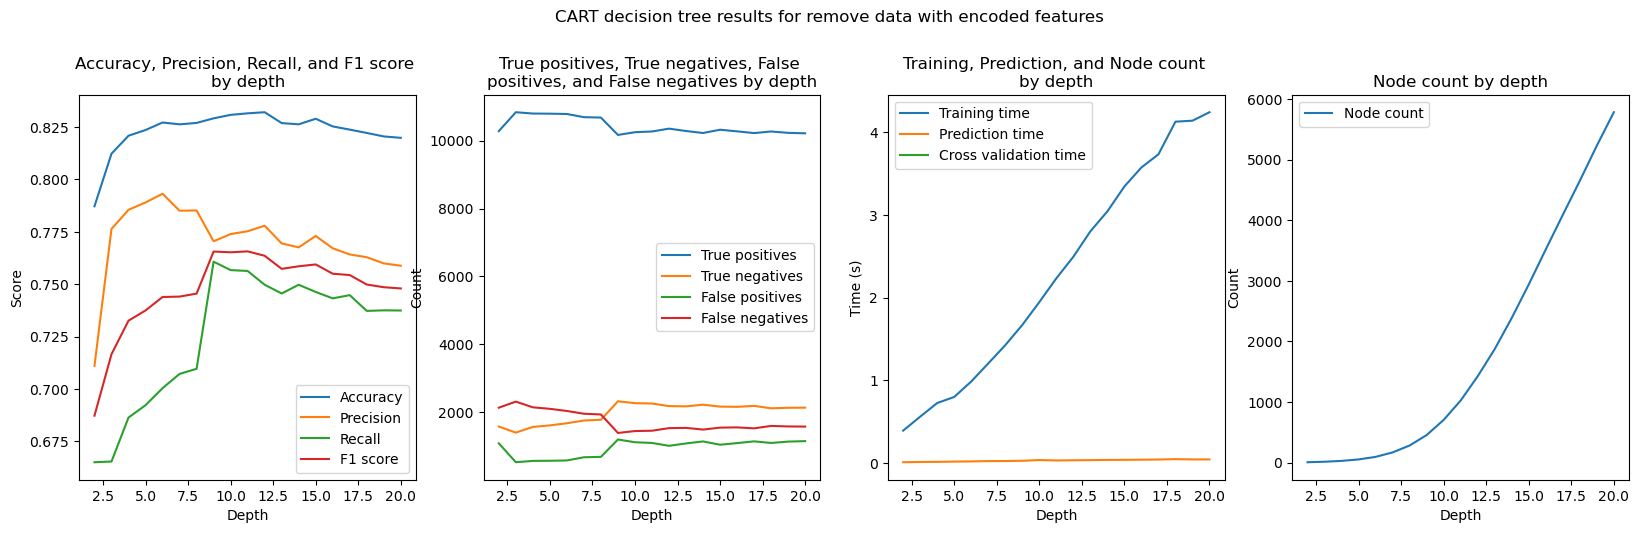

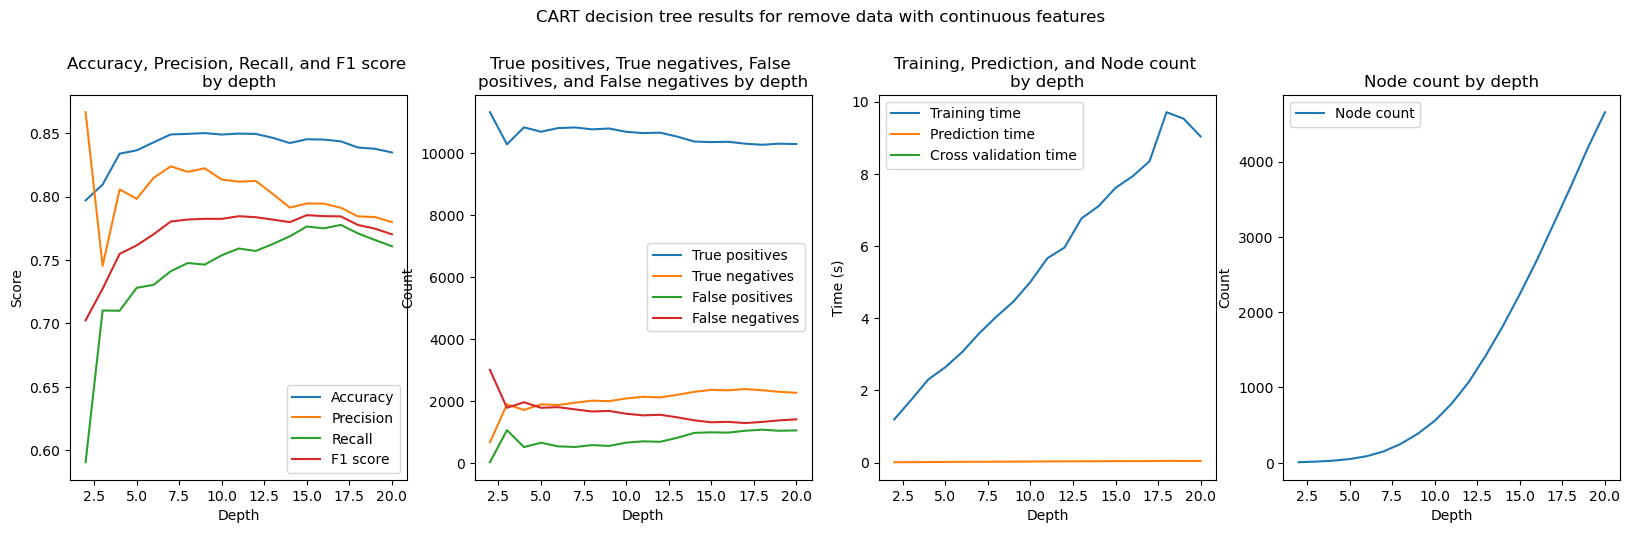

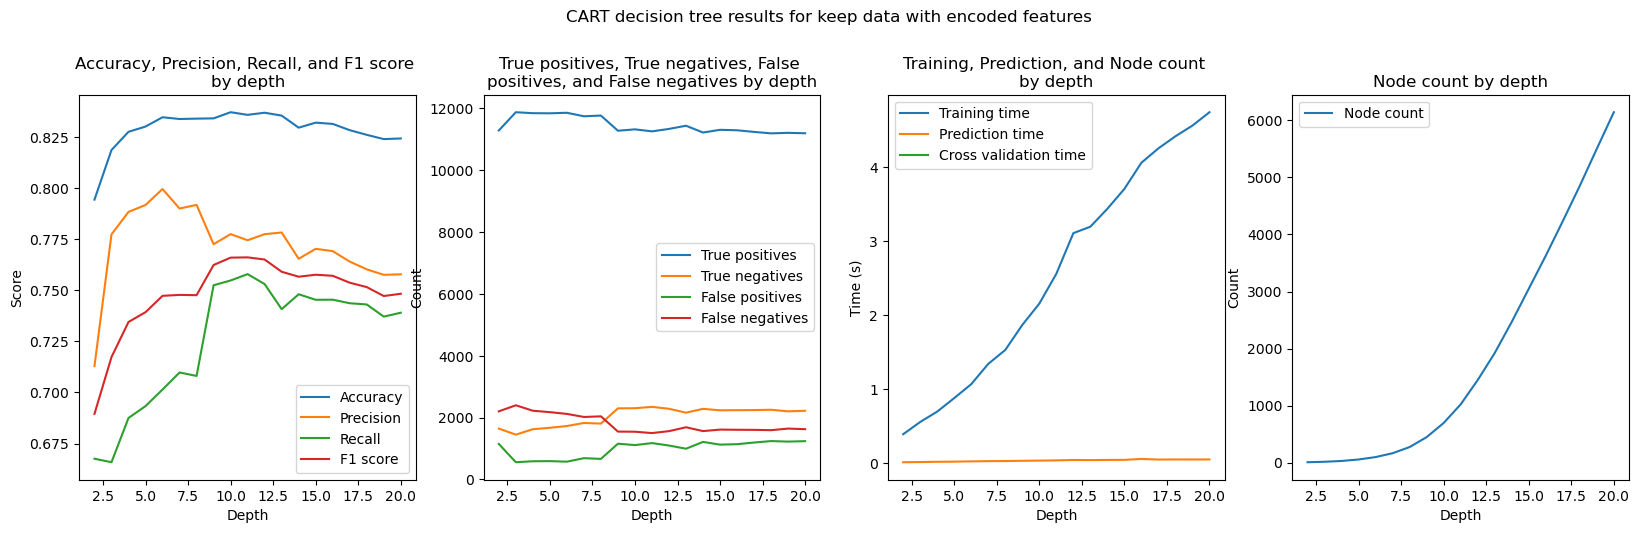

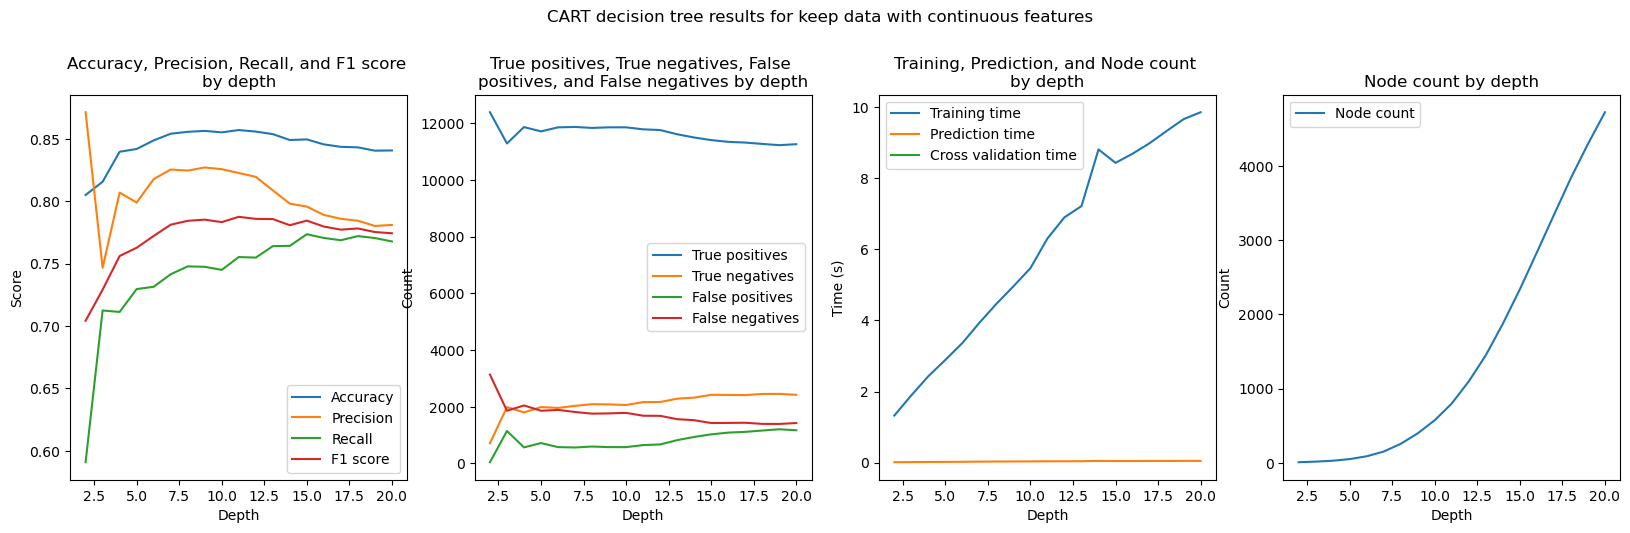

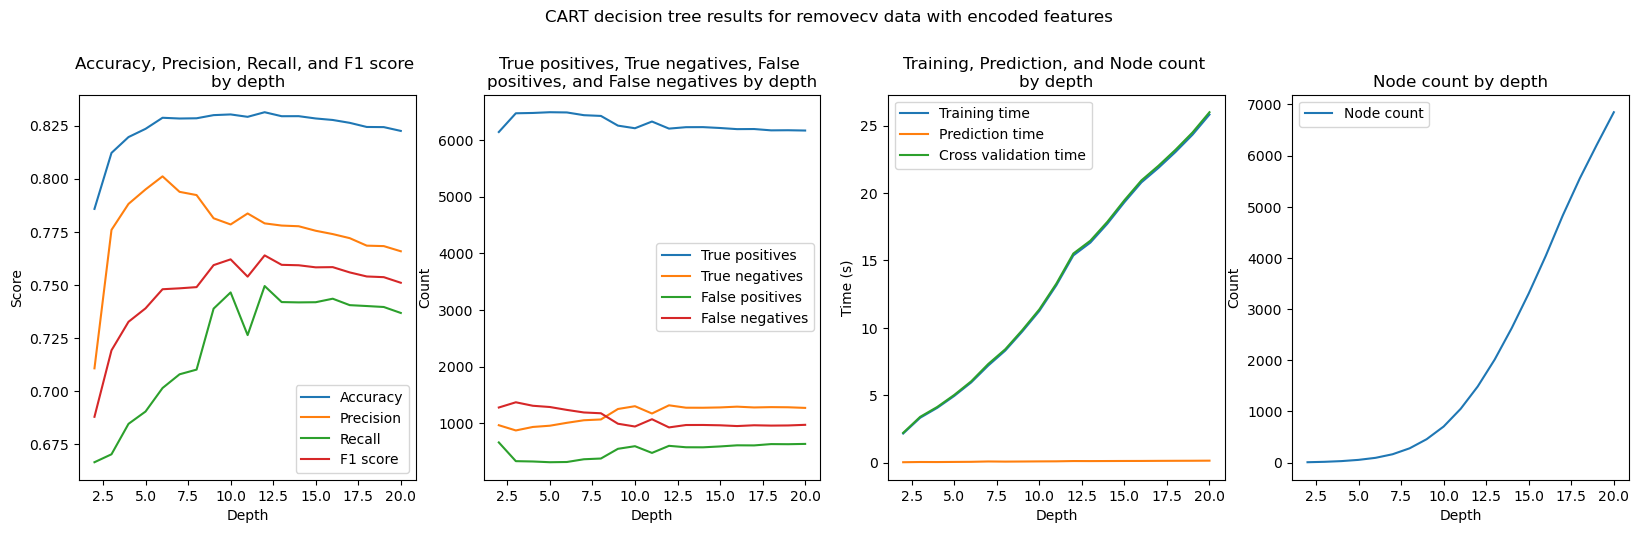

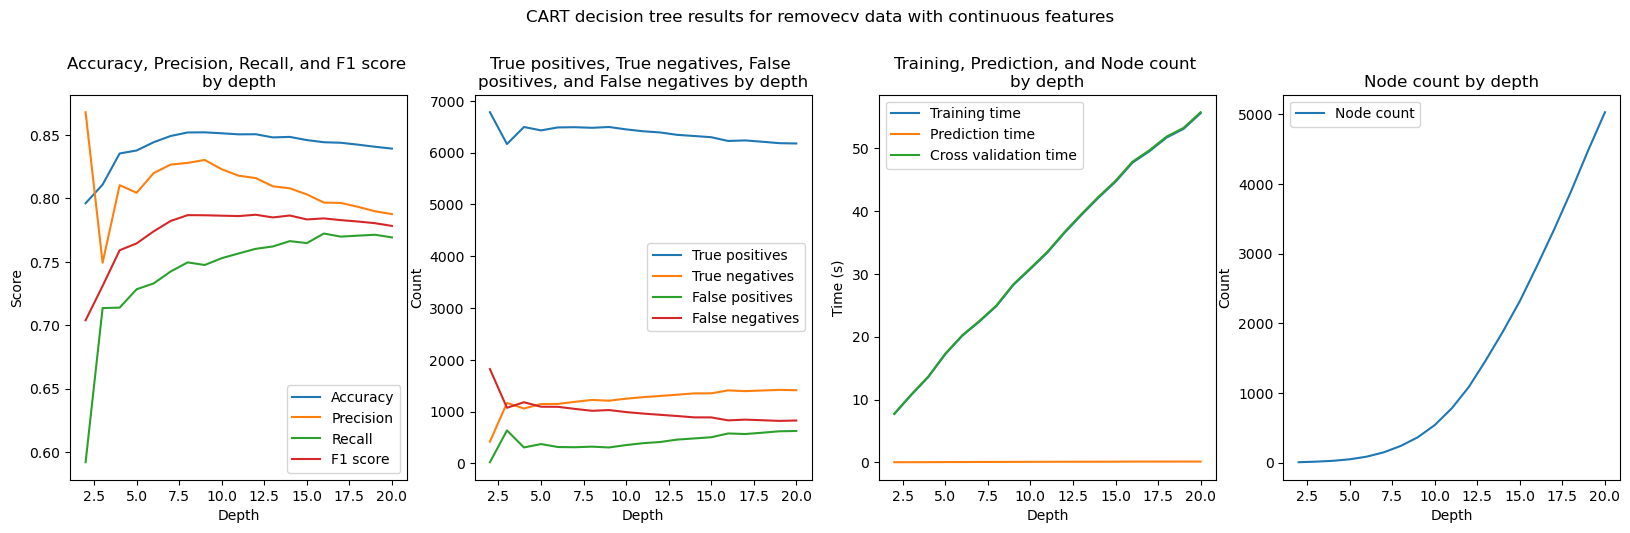

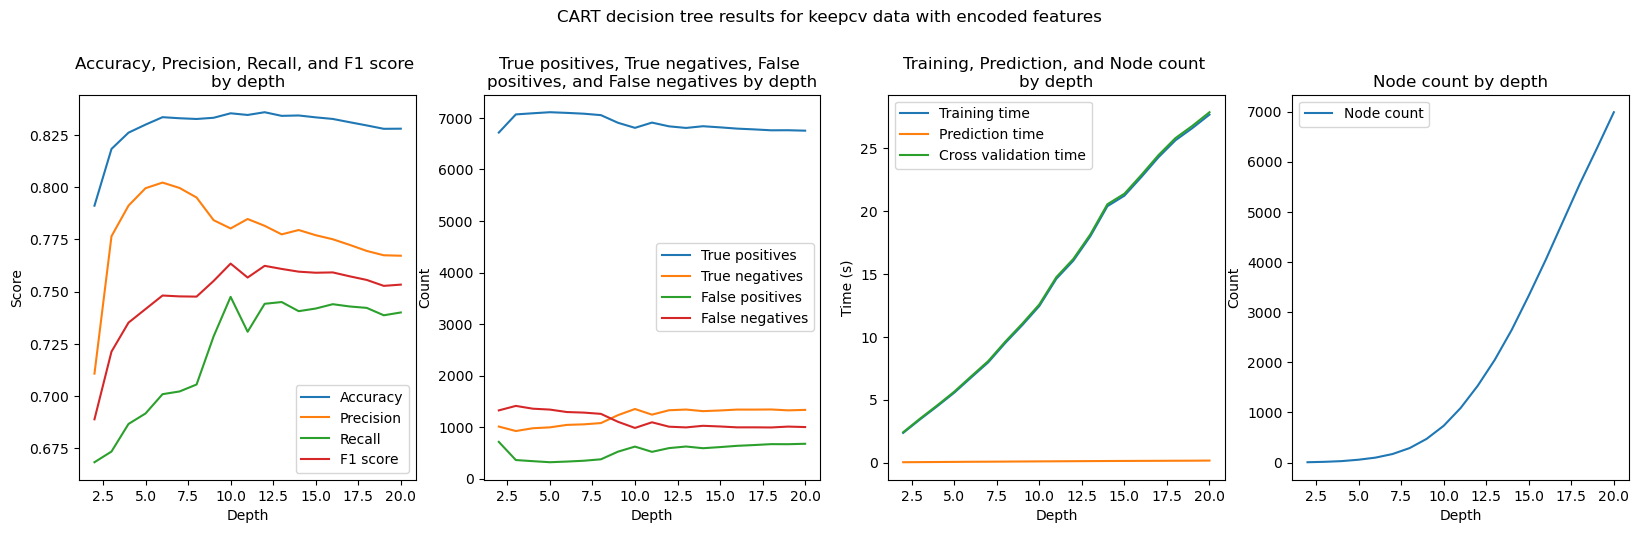

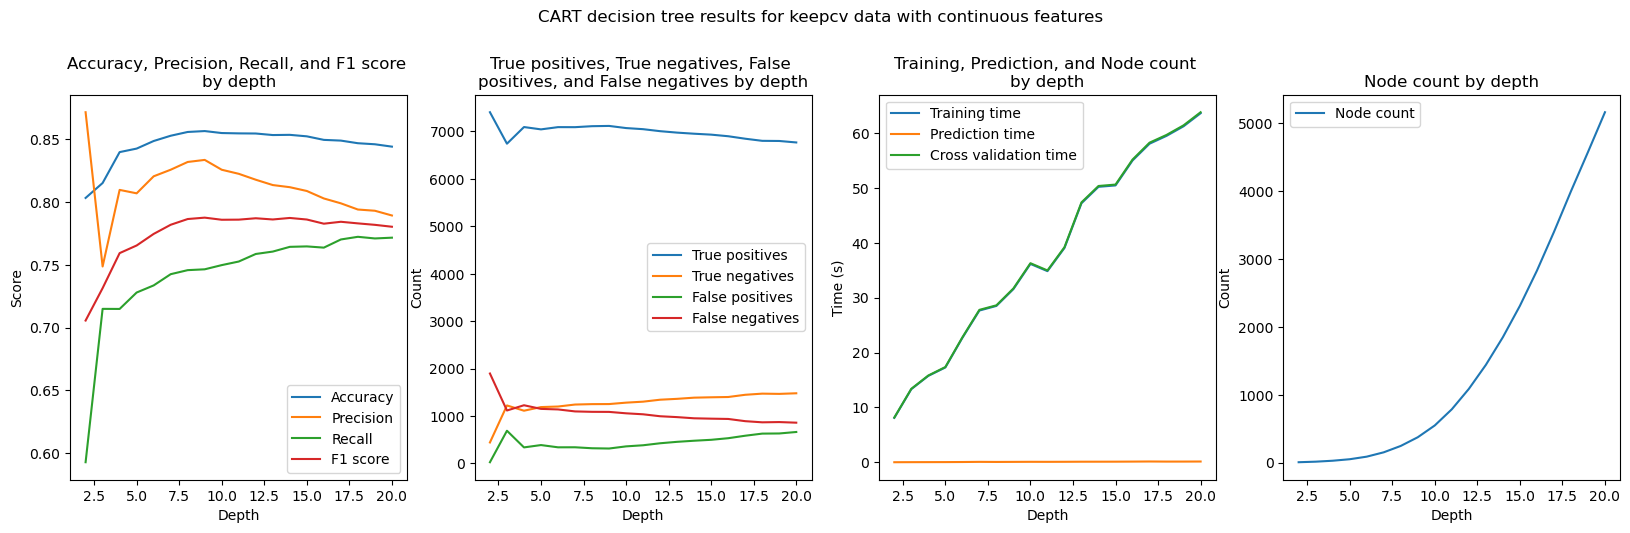

In [43]:
# Function to plot the results by the depth of the tree
def plot_cart_decision_tree_results(cart_decision_tree_results, data_type, feature_type, max_depth=None):
    # Get the data for the specified data_type, feature_type
    data = cart_decision_tree_results[(cart_decision_tree_results['data_type'] == data_type) & (cart_decision_tree_results['feature_type'] == feature_type)]

    # Get the unique values in the max_depth column
    unique_max_depth = data['max_depth'].unique().tolist()

    # Initialize the accuracy, precision, recall, and F1 score
    accuracy = []
    precision = []
    recall = []
    f1_score = []

    # Iterate through each unique value in the max_depth column
    for i in unique_max_depth:
        # Get the data for the specified max_depth
        data_max_depth = data[data['max_depth'] == i]

        # Get the accuracy, precision, recall, and F1 score
        accuracy.append(data_max_depth['accuracy'].values[0])
        precision.append(data_max_depth['precision'].values[0])
        recall.append(data_max_depth['recall'].values[0])
        f1_score.append(data_max_depth['f1_score'].values[0])

    # Initialize the true positives, true negatives, false positives, and false negatives
    true_positives = []
    true_negatives = []
    false_positives = []
    false_negatives = []

    # Iterate through each unique value in the max_depth column
    for i in unique_max_depth:
        # Get the data for the specified max_depth
        data_max_depth = data[data['max_depth'] == i]

        # Get the confusion matrix
        confusion_matrix = data_max_depth['confusion_matrix'].values[0]

        # Get the true negatives, false positives, false negatives, and true positives
        true_positives.append(confusion_matrix[0][0])
        false_positives.append(confusion_matrix[0][1])
        false_negatives.append(confusion_matrix[1][0])
        true_negatives.append(confusion_matrix[1][1])

    # Create subplots 1 row x 4 columns
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    # Plot for accuracy, precision, recall, and F1 score by depth
    ax[0].plot(unique_max_depth, accuracy, label='Accuracy')
    ax[0].plot(unique_max_depth, precision, label='Precision')
    ax[0].plot(unique_max_depth, recall, label='Recall')
    ax[0].plot(unique_max_depth, f1_score, label='F1 score')
    ax[0].set_title('Accuracy, Precision, Recall, and F1 score \nby depth')
    ax[0].set_xlabel('Depth')
    ax[0].set_ylabel('Score')
    ax[0].legend()

    # Plot for true positives, true negatives, false positives, and false negatives by depth
    ax[1].plot(unique_max_depth, true_positives, label='True positives')
    ax[1].plot(unique_max_depth, true_negatives, label='True negatives')
    ax[1].plot(unique_max_depth, false_positives, label='False positives')
    ax[1].plot(unique_max_depth, false_negatives, label='False negatives')
    ax[1].set_title('True positives, True negatives, False \npositives, and False negatives by depth')
    ax[1].set_xlabel('Depth')
    ax[1].set_ylabel('Count')
    ax[1].legend()
    
    # Plot for training, prediction time and cross validation time (if available) by depth
    ax[2].plot(unique_max_depth, data['training_time'], label='Training time')
    ax[2].plot(unique_max_depth, data['prediction_time'], label='Prediction time')
    ax[2].plot(unique_max_depth, data['cross_validation_time'], label='Cross validation time')
    ax[2].set_title('Training, Prediction, and Node count \nby depth')
    ax[2].set_xlabel('Depth')
    ax[2].set_ylabel('Time (s)')
    ax[2].legend()

    # Plot for node count by depth
    ax[3].plot(unique_max_depth, data['nodes_count'], label='Node count')
    ax[3].set_title('Node count by depth')
    ax[3].set_xlabel('Depth')
    ax[3].set_ylabel('Count')
    ax[3].legend()

    # Set the title of the figure
    fig.suptitle('CART decision tree results for ' + data_type + ' data with ' + feature_type + ' features', y=1.05)

    # Save the figure
    # plt.savefig('cart_decision_tree_results_' + data_type + '_' + feature_type + '.png')
    
    # Show the figure
    plt.show()

# Plot the accuracy, precision, recall, F1 score, and confusion matrix for each dataset
for i in cart_decision_tree_results['data_type'].unique().tolist():
    # iterate through each feature type in i
    for j in cart_decision_tree_results[cart_decision_tree_results['data_type'] == i]['feature_type'].unique().tolist():
        # Plot the results by the depth of the tree
        plot_cart_decision_tree_results(cart_decision_tree_results, i, j)


### Over-fitting/ Under-fitting

We are able to observe possible overfitting when training models with depth beyond 11 as accuracy has shown to decrease.

### Top metrics

In [51]:


# Get the unique values in the data_type and feature_type column
unique_data_type = cart_decision_tree_results['data_type'].unique().tolist()
unique_feature_type = cart_decision_tree_results['feature_type'].unique().tolist()

# Add column to store the aggregate of accuracy, precision, recall, and F1 score
cart_decision_tree_results['aggregate'] = cart_decision_tree_results['accuracy'] + cart_decision_tree_results['precision'] + cart_decision_tree_results['recall'] + cart_decision_tree_results['f1_score']

# Initialize variable to store the index of record with the maximum aggregate for each dataset
max_index = {}
max_index_accuracy = {}
max_index_precision = {}
max_index_recall = {}
max_index_f1_score = {}

# Iterate through each unique value in the data_type column
for i in unique_data_type:
    for j in unique_feature_type:
        # Get the data for the specified data_type and feature_type
        data_data_type = cart_decision_tree_results[(cart_decision_tree_results['data_type'] == i) & (cart_decision_tree_results['feature_type'] == j)]

        # Get the index of the row with the maximum aggregate
        max_index[f"{i}_{j}"] = data_data_type['aggregate'].idxmax()
        max_index_accuracy[f"{i}_{j}"] = data_data_type['accuracy'].idxmax()
        max_index_precision[f"{i}_{j}"] = data_data_type['precision'].idxmax()
        max_index_recall[f"{i}_{j}"] = data_data_type['recall'].idxmax()
        max_index_f1_score[f"{i}_{j}"] = data_data_type['f1_score'].idxmax()

# Extract the row with the maximum for each dataset into a dataframe
cart_decision_tree_results_best = cart_decision_tree_results.loc[max_index.values()]
cart_decision_tree_results_best_accuracy = cart_decision_tree_results.loc[max_index_accuracy.values()]
cart_decision_tree_results_best_precision = cart_decision_tree_results.loc[max_index_precision.values()]
cart_decision_tree_results_best_recall = cart_decision_tree_results.loc[max_index_recall.values()]
cart_decision_tree_results_best_f1_score = cart_decision_tree_results.loc[max_index_f1_score.values()]

# Display the best results by dataset in table format
print("Best overall by dataset in table format:")
cart_decision_tree_results_best.reset_index(drop=True, inplace=True)
print(tabulate(cart_decision_tree_results_best, headers='keys', tablefmt='pretty'))

# Display the best accuracy results by dataset in table format
print("Best accuracy by dataset in table format:")
cart_decision_tree_results_best_accuracy.reset_index(drop=True, inplace=True)
print(tabulate(cart_decision_tree_results_best_accuracy, headers='keys', tablefmt='pretty'))

# Display the best precision results by dataset in table format
print("Best precision by dataset in table format:")
cart_decision_tree_results_best_precision.reset_index(drop=True, inplace=True)
print(tabulate(cart_decision_tree_results_best_precision, headers='keys', tablefmt='pretty'))

# Display the best recall results by dataset in table format
print("Best recall by dataset in table format:")
cart_decision_tree_results_best_recall.reset_index(drop=True, inplace=True)
print(tabulate(cart_decision_tree_results_best_recall, headers='keys', tablefmt='pretty'))

# Display the best F1 score results by dataset in table format
print("Best F1 score by dataset in table format:")
cart_decision_tree_results_best_f1_score.reset_index(drop=True, inplace=True)
print(tabulate(cart_decision_tree_results_best_f1_score, headers='keys', tablefmt='pretty'))



Best overall by dataset in table format:
+---+-----------+--------------+-----------+----------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------+-------------------+-----------------------+--------------------+
|   | data_type | feature_type | max_depth | min_size | nodes_count |      accuracy      |     precision      |       recall       |      f1_score      |   training_time    |   prediction_time    | confusion_matrix  | cross_validation_time |     aggregate      |
+---+-----------+--------------+-----------+----------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------+-------------------+-----------------------+--------------------+
| 0 |  remove   |   encoded    |    11     |    5     |    1025     | 0.8315405046480744 | 0.7752648370817984 | 0.7563018652455272 |  0.76566595689663  | 2.23387908935546

# Bibliography


1. Emmanuel, T., Maupong, T., Mpoeleng, D., Semong, T., Mphago, B., & Tabona, O. (2021). A survey on missing data in machine learning. Journal of Big Data, 8(1), 140. https://doi.org/10.1186/s40537-021-00516-9
2. Sharma, S. (2021, November 8). Decision Tree and its types. Medium. https://sid-sharma1990.medium.com/decision-tree-and-its-types-76db66644622
3. Decision Trees. (n.d.). Retrieved 24 September 2023, from https://www.cs.cmu.edu/~bhiksha/courses/10-601/decisiontrees/
4. Decision Tree. (2017, October 16). GeeksforGeeks. https://www.geeksforgeeks.org/decision-tree/
5. K, D. (2023, February 7). Top 5 advantages and disadvantages of Decision Tree Algorithm. Medium. https://dhirajkumarblog.medium.com/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a
6. How to Deal with Missing Data. (n.d.). CORP-MIDS1 (MDS). Retrieved 23 September 2023, from https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/
7. Severson, K. A., Molaro, M. C., & Braatz, R. D. (2017). Principal Component Analysis of Process Datasets with Missing Values. Processes, 5(3), Article 3. https://doi.org/10.3390/pr5030038
8. Acock, A. C. (2005). Working with Missing Values. Journal of Marriage and Family, 67(4), 1012–1028.
9. Wang, J. (2022). Research on Income Forecasting based on Machine Learning Methods and the Importance of Features. Proceedings of the International Conference on Information Economy, Data Modeling and Cloud Computing, ICIDC 2022, 17-19 June 2022, Qingdao, China. Proceedings of the International Conference on Information Economy, Data Modeling and Cloud Computing, ICIDC 2022, 17-19 June 2022, Qingdao, China, Qingdao, People’s Republic of China. https://doi.org/10.4108/eai.17-6-2022.2322745
10. Chakrabarty, N., & Biswas, S. (2018). A Statistical Approach to Adult Census Income Level Prediction. 2018 International Conference on Advances in Computing, Communication Control and Networking (ICACCCN), 207–212. https://doi.org/10.1109/ICACCCN.2018.8748528
11. Comparative Study of Classifiers in predicting the Income Range of a person from a census data | by Ritvik Khanna | Towards Data Science. (n.d.). Retrieved 23 September 2023, from https://towardsdatascience.com/comparative-study-of-classifiers-in-predicting-the-income-range-of-a-person-from-a-census-data-96ce60ee5a10
12. Agarwal, A. (2019, April 20). Logistic Regression classifier on Census Income Data. Medium. https://towardsdatascience.com/logistic-regression-classifier-on-census-income-data-e1dbef0b5738
13. Guo, H., Nguyen, H., Vu, D.-A., & Bui, X.-N. (2019). Forecasting mining capital cost for open-pit mining projects based on artificial neural network approach. Resources Policy, 74. https://doi.org/10.1016/j.resourpol.2019.101474
14. CART (Classification And Regression Tree) in Machine Learning. (2022, September 23). GeeksforGeeks. https://www.geeksforgeeks.org/cart-classification-and-regression-tree-in-machine-learning/
15. deepankar. (2021, April 22). Decision Trees with CART Algorithm. Geek Culture. https://medium.com/geekculture/decision-trees-with-cart-algorithm-
16. Sumitkrsharma. (2022, January 21). Understanding Decision Trees CART Algorithm | Machine Learning. Medium. https://sumit-kr-sharma.medium.com/understanding-decision-trees-cart-algorithm-machine-learning-748f0c2249a6
17. Boonamnuay, S., Kerdprasop, N., & Kerdprasop, K. (2018). Classification and Regression Tree with Resampling for Classifying Imbalanced Data. International Journal of Machine Learning and Computing, 8, 336–340. https://doi.org/10.18178/ijmlc.2018.8.4.708
18. Zhao, L., Lee, S., & Jeong, S.-P. (2021). Decision Tree Application to Classification Problems with Boosting Algorithm. Electronics, 10(16), Article 16. https://doi.org/10.3390/electronics10161903
19. Rokach, L., & Maimon, O. (2005). Decision Trees. In Data Mining and Knowledge Discovery Handbook (pp. 165–192). Springer, Boston, MA. https://doi.org/10.1007/0-387-25465-X_9
20. Galarnyk, M. (2022, April 27). Understanding Decision Trees for Classification (Python). Medium. https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952
21. Dash, S. (2022, November 2). Decision Trees Explained—Entropy, Information Gain, Gini Index, CCP Pruning.. Medium. https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c
22. ML | Gini Impurity and Entropy in Decision Tree. (2020, July 14). GeeksforGeeks. https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/
23. Valente, J. (2019, October 31). Decision Tree from Scratch in Python. Medium. https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775
24. Khan, S. I., & Hoque, A. S. M. L. (2020). SICE: An improved missing data imputation technique. Journal of Big Data, 7(1), 37. https://doi.org/10.1186/s40537-020-00313-w
